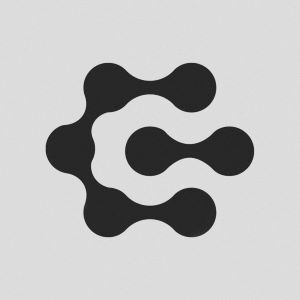

##Web Scraping Showcase

Here we present an example of our web scraping efforts to collect data.

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

teams_data=pd.DataFrame(columns=[ 'Squad','#Pl',	'Age','Poss','MP','Starts'	,'Min','90s','Gls','Ast','G+A','G-PK','PK','PKatt','CrdY',	'CrdR'	,'xG','npxG','xAG','npxG+xAG','PrgC','PrgP','Gls/90',	'Ast/90'	,'Gls+Ast/90'	,'G-PK/90',	'G+Ast-PK/90',	'xG/90',	'xAG/90'	,'xG+xAG/90'	,'npxG/90',	'npxG+xAG/90','Season'])
url = f"https://fbref.com/en/comps/9/2020-2021/stats/2020-2021-Premier-League-Stats"

response = requests.get(url)

if response.status_code == 200:

    soup = BeautifulSoup(response.content, "html.parser")


    table = soup.find("table")
    print(table)
    rows = table.find_all("tr")

    for row in rows:
        cells = row.find_all("td")
        team_name=row.find("th")
        team_name=team_name.text.strip()
        row_data = [cell.text.strip() for cell in cells]


        if len(row_data)==0:
          continue
        data={'Squad':team_name,
              "#Pl":row_data[0],
              'Age':row_data[1],
              'Poss':row_data[2],
              'MP':row_data[3],
              'Starts':row_data[4],
              'Min':row_data[5],
              '90s':row_data[6],
              'Gls':row_data[7],
              'Ast':row_data[8],
              'G+A':row_data[9],
              'G-PK':row_data[10],
              'PK':row_data[11],
              'PKatt':row_data[12],
              'CrdY':row_data[13],
              "CrdR":row_data[14],
              'xG':row_data[15],
              'npxG':row_data[16],
              'xAG':row_data[17],
              'npxG+xAG':row_data[18],
              'PrgC':row_data[19],
              'PrgP':row_data[20],'Gls/90':row_data[21],'Ast/90':row_data[22],'Gls+Ast/90':row_data[23],'G-PK/90':row_data[24],'G+Ast-PK/90':row_data[25],'xG/90':row_data[26],'xAG/90':row_data[27],'xG+xAG/90':row_data[28],'npxG/90':row_data[29],'npxG+xAG/90':row_data[30],'Season':'2020-2021'}

        teams_data=teams_data.append(data,ignore_index=True)

else:
    print("Failed to retrieve webpage. Status code:", response.status_code)

teams_data.head()

<table class="stats_table sortable min_width" data-cols-to-freeze=",1" id="stats_squads_standard_for"> <caption>Squad Standard Stats <span style="color: #666; font-size:smaller">2020-2021 Premier League</span> Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr class="over_header"> <th aria-label="" class="over_header center" colspan="4" data-stat=""></th> <th aria-label="" class="over_header center group_start" colspan="4" data-stat="header_playing">Playing Time</th> <th aria-label="" class="over_header center group_start" colspan="8" data-stat="header_performance">Performance</th> <th aria-label="" class="over_header center group_start" colspan="4" data-stat="header_expected">Expected</th> <th aria-label="" class="over_header center group_start" colspan="2" data-stat="header_progression">Progressi

<ipython-input-4-7829b8f64598>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  teams_data=teams_data.append(data,ignore_index=True)
<ipython-input-4-7829b8f64598>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  teams_data=teams_data.append(data,ignore_index=True)
<ipython-input-4-7829b8f64598>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  teams_data=teams_data.append(data,ignore_index=True)
<ipython-input-4-7829b8f64598>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  teams_data=teams_data.append(data,ignore_index=True)
<ipython-input-4-7829b8f64598>:51: FutureWarning: The frame.append method is deprecated and will be removed 

,Squad,#Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Ast/90,Gls+Ast/90,G-PK/90,G+Ast-PK/90,xG/90,xAG/90,xG+xAG/90,npxG/90,npxG+xAG/90,Season
0,Arsenal,29,25.9,53.5,38,418,"3,420",38.0,53,38,...,1.00,2.39,1.24,2.24,1.36,0.92,2.29,1.24,2.16,2020-2021
1,Aston Villa,24,25.2,48.5,38,418,"3,420",38.0,52,38,...,1.00,2.37,1.24,2.24,1.38,0.98,2.37,1.26,2.25,2020-2021
2,Brighton,27,25.8,51.1,38,418,"3,420",38.0,39,24,...,0.63,1.66,0.87,1.50,1.34,0.87,2.21,1.15,2.03,2020-2021
3,Burnley,25,28.3,42.1,38,418,"3,420",38.0,32,20,...,0.53,1.37,0.76,1.29,1.03,0.73,1.76,0.97,1.70,2020-2021
4,Chelsea,27,26.0,60.9,38,418,"3,420",38.0,56,38,...,1.00,2.47,1.26,2.26,1.64,1.09,2.73,1.43,2.53,2020-2021


## [1] Data Overview

### 1.1) Importing Modules and Reading data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import warnings
%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('Football_Data.csv',index_col=0)

### 1.2) Data Exploration and EDA

In [ ]:
data.head()

,rank,player name,nationality,position,Squad,Age_Player,Born,MP_Player,starts,Min_Player,90s_Player,Gls_Player,Ast_Player,G+A_Player,G-PK_Player,PK_Player,PKatt_Player,CrdY_Player,CrdR_Player,xG_Player,npxG_Player,xAG_Player,npxg+xag,PrgC_Player,PrgP_Player,PrgR,Gls/90_Player,Ast/90_Player,Gls+Ast/90_Player,G-PK/90_Player,G+Ast-PK/90_Player,xG/90_Player,xAG/90_Player,xG+xAG/90_Player,npxG/90_Player,npxG+xAG/90_Player,Season,#Pl,Age_Team,Poss,MP_Team,Starts,Min_Team,90s_Team,Gls_Team,Ast_Team,G+A_Team,G-PK_Team,PK_Team,PKatt_Team,CrdY_Team,CrdR_Team,xG_Team,npxG_Team,xAG_Team,npxG+xAG,PrgC_Team,PrgP_Team,Gls/90_Team,Ast/90_Team,Gls+Ast/90_Team,G-PK/90_Team,G+Ast-PK/90_Team,xG/90_Team,xAG/90_Team,xG+xAG/90_Team,npxG/90_Team,npxG+xAG/90_Team
0,1,Patrick van Aanholt,nl,DF,Crystal Palace,26,1990,28,25,"2,184",24.3,5,1,6,5,0,0,7,0.0,3.1,3.1,2.1,5.2,46.0,92.0,86.0,0.21,0.04,0.25,0.21,0.25,0.13,0.09,0.21,0.13,0.21,2017-2018,28,27.1,45.2,38,418,"3,420",38.0,44,26,70,36,8,10,NaN,NaN,53.5,45.9,33.3,79.2,727,1308,1.16,0.68,1.84,0.95,1.63,1.41,0.88,2.28,1.21,2.08
1,48,Christian Benteke,be,FW,Crystal Palace,26,1990,31,24,"2,240",24.9,3,5,8,2,1,2,6,0.0,10.2,8.6,2.9,11.5,18.0,42.0,133.0,0.12,0.20,0.32,0.08,0.28,0.41,0.12,0.53,0.34,0.46,2017-2018,28,27.1,45.2,38,418,"3,420",38.0,44,26,70,36,8,10,NaN,NaN,53.5,45.9,33.3,79.2,727,1308,1.16,0.68,1.84,0.95,1.63,1.41,0.88,2.28,1.21,2.08
2,72,Yohan Cabaye,fr,MF,Crystal Palace,31,1986,31,28,"2,376",26.4,0,1,1,0,0,0,7,0.0,2.3,2.3,4.1,6.4,13.0,138.0,37.0,0.00,0.04,0.04,0.00,0.04,0.09,0.15,0.24,0.09,0.24,2017-2018,28,27.1,45.2,38,418,"3,420",38.0,44,26,70,36,8,10,NaN,NaN,53.5,45.9,33.3,79.2,727,1308,1.16,0.68,1.84,0.95,1.63,1.41,0.88,2.28,1.21,2.08
3,92,Lee Chung-yong,kr,"FW,MF",Crystal Palace,29,1988,7,1,135,1.5,0,0,0,0,0,0,0,0.0,0.0,0.0,0.1,0.1,4.0,2.0,16.0,0.00,0.00,0.00,0.00,0.00,0.02,0.05,0.07,0.02,0.07,2017-2018,28,27.1,45.2,38,418,"3,420",38.0,44,26,70,36,8,10,NaN,NaN,53.5,45.9,33.3,79.2,727,1308,1.16,0.68,1.84,0.95,1.63,1.41,0.88,2.28,1.21,2.08
4,111,Scott Dann,eng,DF,Crystal Palace,30,1987,17,16,"1,435",15.9,1,0,1,1,0,0,4,0.0,2.3,2.3,0.2,2.5,7.0,42.0,3.0,0.06,0.00,0.06,0.06,0.06,0.14,0.01,0.16,0.14,0.16,2017-2018,28,27.1,45.2,38,418,"3,420",38.0,44,26,70,36,8,10,NaN,NaN,53.5,45.9,33.3,79.2,727,1308,1.16,0.68,1.84,0.95,1.63,1.41,0.88,2.28,1.21,2.08


<font size='5'>**Data Description :**</font>

   * **rank:** Count of Rows in the Website.

   *  **player name:** The name of the player.

   * **nationality:** The nationality of the player.

   * **position:** The playing position of the player.

   * **Squad:** The team or squad the player is a part of.

   * **Age_Player:** The age of the player.

   * **Born:** The  birthyear of the player.

   * **MP_Player:** Total matches played by the player.

   * **starts:** Number of matches the player started.

   *  **Min_Player:** Total minutes played by the player.

   * **90s_Player:** Total minutes played by the player converted to 90-minute intervals.

   * **Gls_Player:** Total goals scored by the player.

   * **Ast_Player:** Total assists made by the player.

   * **G+A_Player:** Combined goals and assists by the player.

   * **G-PK_Player:** Goals scored by the player excluding penalty kicks.

   * **PK_Player:** Total penalty kicks scored by the player.

   * **PKatt_Player:** Total penalty kicks attempted by the player.

   *  **CrdY_Player:** Total yellow cards received by the player.

   * **CrdR_Player:** Total red cards received by the player.

   * **xG_Player:** Expected goals for the individual player.

   * **npxG_Player:** Non-penalty expected goals for the individual player.

   * **xAG_Player:** Expected assists for the individual player.

   * **npxg+xag:** Combined non-penalty expected goals and expected assists for the player.

   * **PrgC_Player:** Progressive carries by the player.

   * **PrgP_Player:** Progressive passes by the player.

   * **PrgR:** Progressive receptions.

   * **Gls/90_Player:** Goals per 90 minutes for the individual player.

   * **Ast/90_Player:** Assists per 90 minutes for the individual player.

   * **Gls+Ast/90_Player:** Combined goals and assists per 90 minutes for the individual player.

   * **G-PK/90_Player:** Goals per 90 minutes excluding penalty kicks for the individual player.

   * **G+Ast-PK/90_Player:** Combined goals and assists per 90 minutes excluding penalty kicks for the individual player.

   * **xG/90_Player:** Expected goals per 90 minutes for the individual player.

   * **xAG/90_Player:** Expected assists per 90 minutes for the individual player.

   * **xG+xAG/90_Player:** Combined expected goals and expected assists per 90 minutes for the individual player.

   * **npxG/90_Player:** Non-penalty expected goals per 90 minutes for the individual player.

   * **npxG+xAG/90_Player:** Combined non-penalty expected goals and expected assists per 90 minutes for the individual player.

   * **Season:** The season to which the data corresponds.

   * **#Pl:** The number of players in a team.

   * **Age_Team:** The average age of the team.

   * **Poss:** Possession percentage.

   * **MP_Team:** Total matches played by the team.

   * **Starts:** Number of starts by the team.

   * **Min_Team:** Total minutes played by the team.

   * **90s_Team:** Total minutes played by the team converted to 90-minute intervals.

   * **Gls_Team:** Total goals scored by the team.

   * **Ast_Team:** Total assists made by the team.

   * **G+A_Team:** Combined goals and assists by the team.

   * **G-PK_Team:** Goals scored by the team excluding penalty kicks.

   * **PK_Team:** Total penalty kicks scored by the team.

   * **PKatt_Team:** Total penalty kicks attempted by the team.

   * **CrdY_Team:** Total yellow cards received by the team.

   * **CrdR_Team:** Total red cards received by the team.

   * **xG_Team:** Expected goals for the team.

   * **npxG_Team:** Non-penalty expected goals for the team.

   * **xAG_Team:** Expected assists for the team.

   * **npxG+xAG:** Combined non-penalty expected goals and expected assists for the team.

   * **PrgC_Team:** Progressive carries by the team.

   * **PrgP_Team:** Progressive passes by the team.

   * **Gls/90_Team:** Goals per 90 minutes for the team.

   * **Ast/90_Team:** Assists per 90 minutes for the team.

   * **Gls+Ast/90_Team:** Combined goals and assists per 90 minutes for the team.

   * **G-PK/90_Team:** Goals per 90 minutes excluding penalty kicks for the team.

   * **G+Ast-PK/90_Team:** Combined goals and assists per 90 minutes excluding penalty kicks for the team.

   * **xG/90_Team:** Expected goals per 90 minutes for the team.

   * **xAG/90_Team:** Expected assists per 90 minutes for the team.

   * **xG+xAG/90_Team:** Combined expected goals and expected assists per 90 minutes for the team.

   * **npxG/90_Team:** Non-penalty expected goals per 90 minutes for the team.

   * **npxG+xAG/90_Team:** Combined non-penalty expected goals and expected assists per 90 minutes for the team

Determining the dimensions of the dataset by retrieving the count of rows and columns.

In [ ]:
data.shape

(3206, 68)

Obtaining insightful information regarding the dataset's attributes and their characteristics.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3206 entries, 0 to 3205
Data columns (total 68 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                3206 non-null   int64  
 1   player name         3206 non-null   object 
 2   nationality         3206 non-null   object 
 3   position            3206 non-null   object 
 4   Squad               3206 non-null   object 
 5   Age_Player          3206 non-null   int64  
 6   Born                3206 non-null   int64  
 7   MP_Player           3206 non-null   int64  
 8   starts              3206 non-null   object 
 9   Min_Player          3206 non-null   object 
 10  90s_Player          3206 non-null   float64
 11  Gls_Player          3206 non-null   int64  
 12  Ast_Player          3206 non-null   int64  
 13  G+A_Player          3206 non-null   int64  
 14  G-PK_Player         3206 non-null   int64  
 15  PK_Player           3206 non-null   int64  
 16  PKatt_

- starts, Min_Player and Min_Team columns are in wrong format.

Statistical summaries for the numerical columns

In [ ]:
data.describe()

,rank,Age_Player,Born,MP_Player,90s_Player,Gls_Player,Ast_Player,G+A_Player,G-PK_Player,PK_Player,PKatt_Player,CrdY_Player,CrdR_Player,xG_Player,npxG_Player,xAG_Player,npxg+xag,PrgC_Player,PrgP_Player,PrgR,Gls/90_Player,Ast/90_Player,Gls+Ast/90_Player,G-PK/90_Player,G+Ast-PK/90_Player,xG/90_Player,xAG/90_Player,xG+xAG/90_Player,npxG/90_Player,npxG+xAG/90_Player,#Pl,Age_Team,Poss,MP_Team,Starts,90s_Team,Gls_Team,Ast_Team,G+A_Team,G-PK_Team,PK_Team,PKatt_Team,CrdY_Team,CrdR_Team,xG_Team,npxG_Team,xAG_Team,npxG+xAG,PrgC_Team,PrgP_Team,Gls/90_Team,Ast/90_Team,Gls+Ast/90_Team,G-PK/90_Team,G+Ast-PK/90_Team,xG/90_Team,xAG/90_Team,xG+xAG/90_Team,npxG/90_Team,npxG+xAG/90_Team
count,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3204.000000,3204.000000,3204.000000,3204.000000,3203.000000,3206.000000,3206.000000,3206.00000,3206.0,3206.0,3206.0,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,2677.000000,2677.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000,3206.000000
mean,268.012477,25.595758,1993.548971,19.888958,15.611385,1.900187,1.349657,3.249844,1.752963,0.147224,0.189644,2.368060,0.084591,1.942902,1.793760,1.365398,3.164680,25.952262,54.693916,54.188456,0.105721,0.086691,0.192318,0.099476,0.186064,0.130665,0.086904,0.217631,0.124073,0.211133,26.991266,26.676949,49.89214,38.0,418.0,38.0,50.385839,35.731441,86.117280,46.457891,3.927948,5.020586,64.706761,2.149047,50.459482,46.574828,35.899189,82.474797,689.389270,1455.718029,1.325758,0.940381,2.265696,1.222424,2.162998,1.328029,0.944435,2.272486,1.225633,2.170384
std,154.877754,4.302961,4.700443,11.782221,11.507875,3.484401,2.150430,5.022659,3.139917,0.696886,0.836883,2.521402,0.314248,3.136433,2.784532,1.867308,4.210999,32.172220,58.798718,71.758608,0.176431,0.401710,0.449899,0.167869,0.445683,0.210421,0.240734,0.334976,0.204049,0.329993,2.734865,0.961094,7.59163,0.0,0.0,0.0,17.787528,14.028451,31.567148,16.809809,2.361572,2.815194,12.706012,1.487809,13.210721,12.303915,10.134998,22.351066,183.343892,378.117976,0.467857,0.369934,0.830489,0.442405,0.806184,0.347362,0.266436,0.609942,0.323614,0.588327
min,1.000000,15.000000,1979.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,24.400000,35.40000,38.0,418.0,38.0,19.000000,12.000000,32.000000,16.000000,0.000000,0.000000,38.000000,0.000000,28.800000,28.000000,19.900000,47.900000,388.000000,844.000000,0.500000,0.320000,0.840000,0.420000,0.760000,0.760000,0.520000,1.280000,0.740000,1.260000
25%,134.000000,22.000000,1990.000000,9.000000,4.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.100000,0.300000,3.000000,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.010000,0.050000,0.020000,0.050000,25.000000,26.100000,44.10000,38.0,418.0,38.0,37.000000,25.000000,62.000000,34.000000,2.000000,3.000000,56.000000,1.000000,40.000000,36.900000,28.500000,65.800000,557.000000,1189.000000,0.970000,0.660000,1.630000,0.890000,1.580000,1.050000,0.750000,1.800000,0.970000,1.730000
50%,268.000000,26.000000,1993.000000,21.000000,14.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.800000,0.800000,0.700000,1.600000,14.000000,37.000000,23.000000,0.030000,0.000000,0.090000,0.000000,0.090000,0.060000,0.050000,0.130000,0.060000,0.130000,27.000000,26.600000,48.80000,38.0,418.0,38.0,48.000000,33.000000,81.000000,43.000000,4.000000,4.000000,64.000000,

<font size='4'>**Observations :**</font>
* **Age_Player:** The average age of players is approximately 26 years. The youngest player is 15 years old, while the oldest is 39 years old.

* **Born:** The birth years of the players range from 1979 to 2007.

*  **MP_Player:** Players, on average, have participated in around 19.9 matches. The maximum number of matches played is 38.
*  **Gls_Player:** The average number of goals scored by a player is approximately 1.9,while the maximum 36
*  **Ast_Player:** On average, players have made around 1.9 assists,while the maximum 20.
*  **CrdY_Player:** Players have, on average, received approximately 2.37 yellow cards.the most yellow cards is 14

*  **CrdR_Player:** The average number of red cards received by players is around 0.08.the most red cards is 4

*  **xG_Player:** The average expected goals for a player are approximately 1.94,while the maximum is 28.4.
*  **PrgC_Player:** The average number of progressive carries by a player is approximately 25.95.

*   **PrgP_Player:** Players, on average, make around 54.69 progressive passes.

*   **PrgR:** The average number of progressive receptions is approximately 54.19.
*   **Gls/90_Player:** On average, players score around 0.11 goals per 90 minutes.while the maximum is 2.03

*   **Ast/90_Player:** The average number of assists per 90 minutes for players is approximately 0.09.while the maximum is 18
*   **Season:** The dataset contains information for multiple seasons.
*   **#Pl:** On average, a team consists of 26 players.however,some teams may have more
*   **Age_Team:**
The average age of players in a team is approximately 27 years.

*   **Poss:**
The average possession percentage for teams is around 49.9%.while the maximum possession percentage is 71 and the minimum is 35.4.

*   **MP_Team:**
 Teams have played, on average,the same number of matches.
*   **Gls_Team:**
 Teams score an average of approximately 50.3 goals.while the maximum is 103 and the minimum is 19

*   **Ast_Team:**
 The average number of assists made by a team is approximately 35.7,while the maximum is 85 and the minimum is 12
*   **PK_Team:**
Teams, on average, score around 3.9 penalty kicks,and the maximum is 10.
*   **PKatt_Team:**
The average number of penalty kicks attempted by teams is approximately 5.02 ,and the maximum is 14.
*   **CrdY_Team:**
Teams, on average, receive approximately 64.7 yellow cards.the most yellow card received by team is 101

*   **CrdR_Team:**
The average number of red cards received by teams is approximately 2.14.the most red card received by team is 6
*    **xG_Team:**
The average expected goals for a team are approximately 50.45 .while the maximum is 92 and the minimum is 28.8

*    **xAG_Team:**
The average expected assists for a team is around 35.9 .while the maximum is 68.4 and the minimum is 19.9

In [ ]:
data.describe(include=['object'])

,player name,nationality,position,Squad,starts,Min_Player,Season,Min_Team
count,3206,3206,3206,3206,3206,3206,3206,3206
unique,1360,212,10,29,40,2098,6,1
top,Chris Wood,eng ENG,DF,Southampton,0,1,2022-2023,"3,420"
freq,8,560,998,171,312,31,569,3206


<font size='4'>Observations</font>
   
*  **player name:** There are 1360 unique players in the dataset. Chris Wood appears most frequently (8 times).

*  **nationality:** There are 212 unique nationalities among the players. The most common nationality is English (ENG), occurring 560 times.

*   **position:** There are 10 unique playing positions, with 'DF' (Defense) being the most frequent (998 times).

*   **Squad:** The dataset includes players from 29 unique squads. Southampton is the most represented squad with 171 occurrences.

*   **starts:** The number of starts by players ranges, with the most common value being 0, indicating some players might not have started in certain matches.

*   **Min_Player:** The minimum value is 1, indicating that some players have played at least 1 minute in a match.

*   **Season:** The data spans across 6 seasons (2016-2017 to 2022-2023).

*   **Min_Team:** The minimum team playing time is 3,420 minutes. This value is likely representing a full season of play for a team.

 Our goal is to determine the average age within each squad, enabling us to identify the squads with the most varied age profiles. By analyzing the distribution of ages across all squads, we aim to gain valuable insights into the diversity of age demographics within our organization.


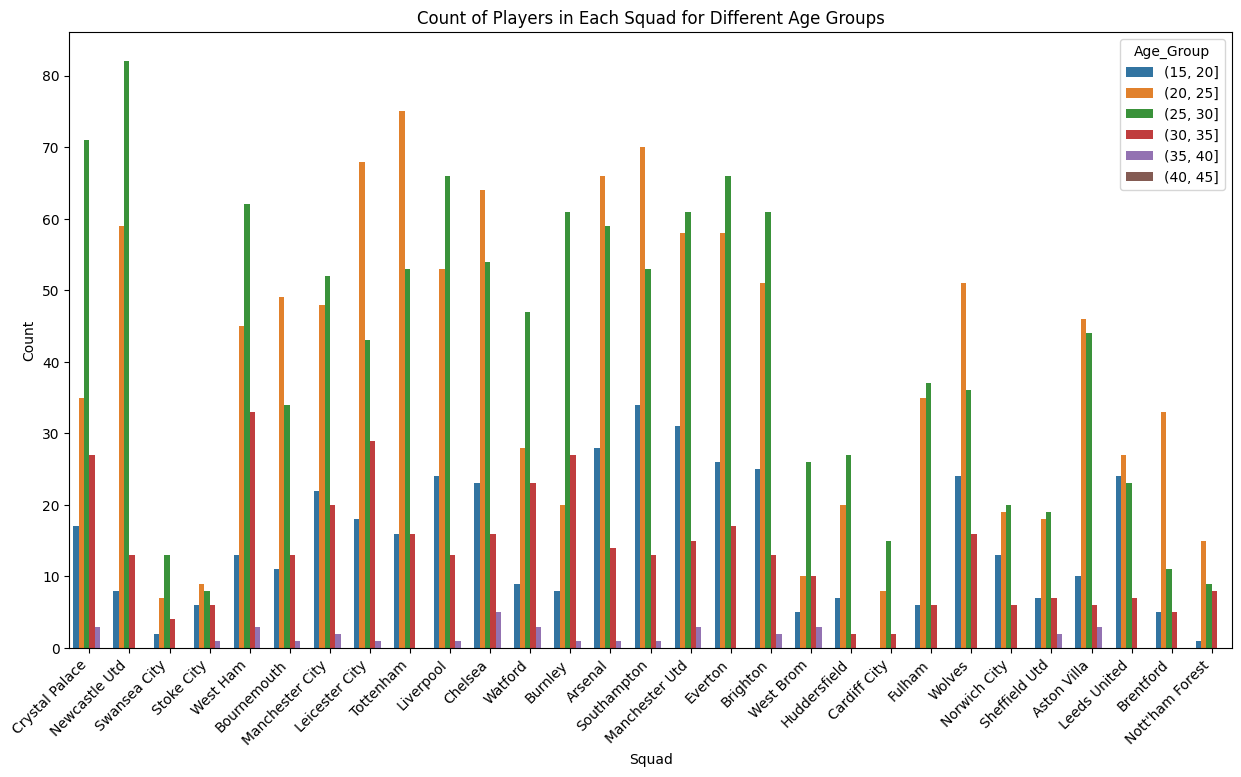

In [ ]:
# Define age bins
age_bins = [15, 20, 25, 30, 35, 40, 45]

# Create a new column for age bins
data['Age_Group'] = pd.cut(data['Age_Player'], bins=age_bins)

# Create a countplot
plt.figure(figsize=(15, 8))
sns.countplot(x='Squad', hue='Age_Group', data=data)
plt.title('Count of Players in Each Squad for Different Age Groups')
plt.xlabel('Squad')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


- The majority of Premier League players fall within the age range of 25 to 30, indicating a concentration of experience and maturity within the league's player base.
- Among the top 6 teams, there is a notable reliance on players aged between 20 and 25, suggesting a strategic emphasis on youthful talent and agility in pursuit of success.


 Our objective is to identify teams that exhibit the greatest diversity of players across all positions. By detecting variations in player roles and positions within each team, we aim to uncover those with the most versatile and adaptable squad compositions.


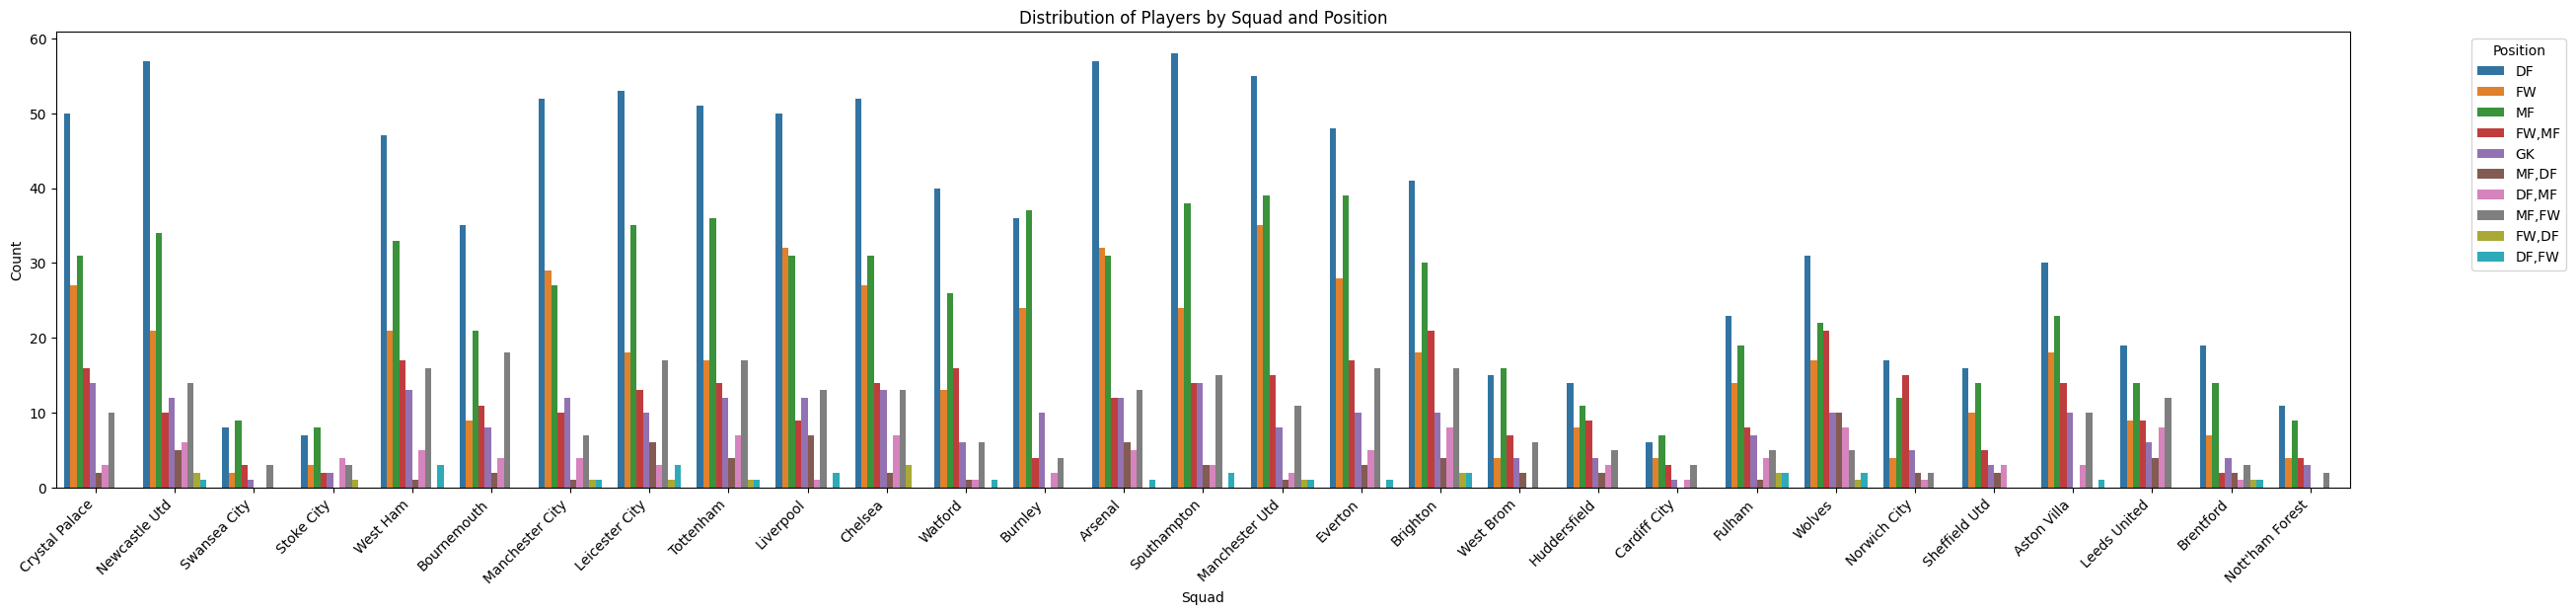

In [ ]:
  # Selecting top few squads for visualization
top_squads = data['Squad'].value_counts().nlargest(29)

# Creating a bar chart
plt.figure(figsize=(30, 6))
sns.countplot(data=data[data['Squad'].isin(top_squads.index)], x='Squad', hue='position')
plt.title('Distribution of Players by Squad and Position')
plt.xlabel('Squad')
plt.ylabel('Count')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()


- Defense (DF) emerges as the most abundant position in the Premier League (PL), contributing to the league's reputation for conceding fewer goals compared to other leagues. This abundance in defensive options results in lower expected goals, underscoring the PL's defensive prowess and tactical acumen.

- The top 6 teams boast a diverse range of options across various positions, a key factor contributing to their success in securing more trophies than other teams. This depth in squad composition enables them to adapt to different strategies and challenges, enhancing their competitive edge in the league.


 Our goal is to showcase the players who have accumulated the most playing time. By highlighting these players, we aim to provide insights into their consistent contributions and importance to their respective teams throughout the season.


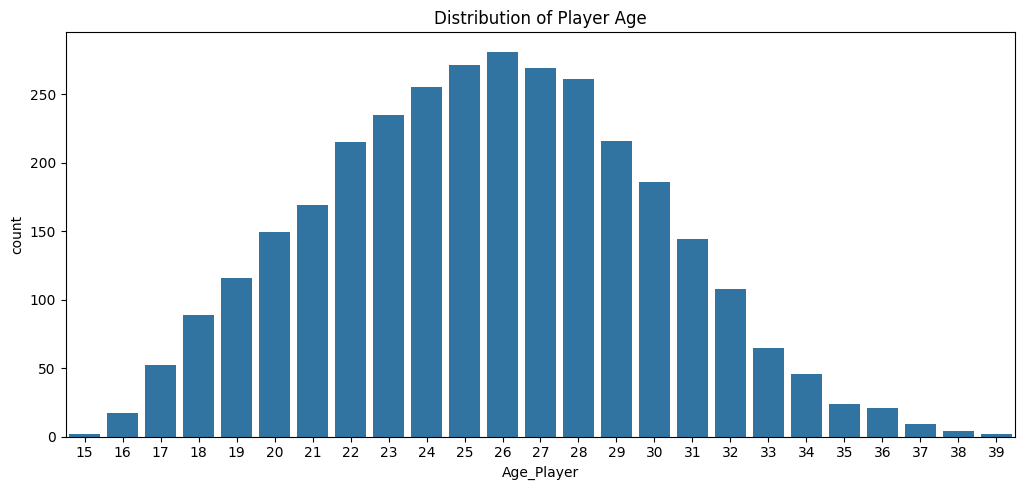

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Age_Player', data=data)
plt.title('Distribution of Player Age')

plt.tight_layout()
plt.show()


- The graph illustrates a normal distribution, indicating that players aged between 20 and 30 possess greater stamina compared to older players. This observation correlates with their increased playing time on the field, shedding light on why they are more frequently utilized by teams.

- A significant majority of starting players fall within the age range of 20 to 30, which represents the most abundant class of players in the Premier League (PL). This demographic dominance underscores the league's reliance on the physical prime and tactical versatility offered by players within this age bracket.


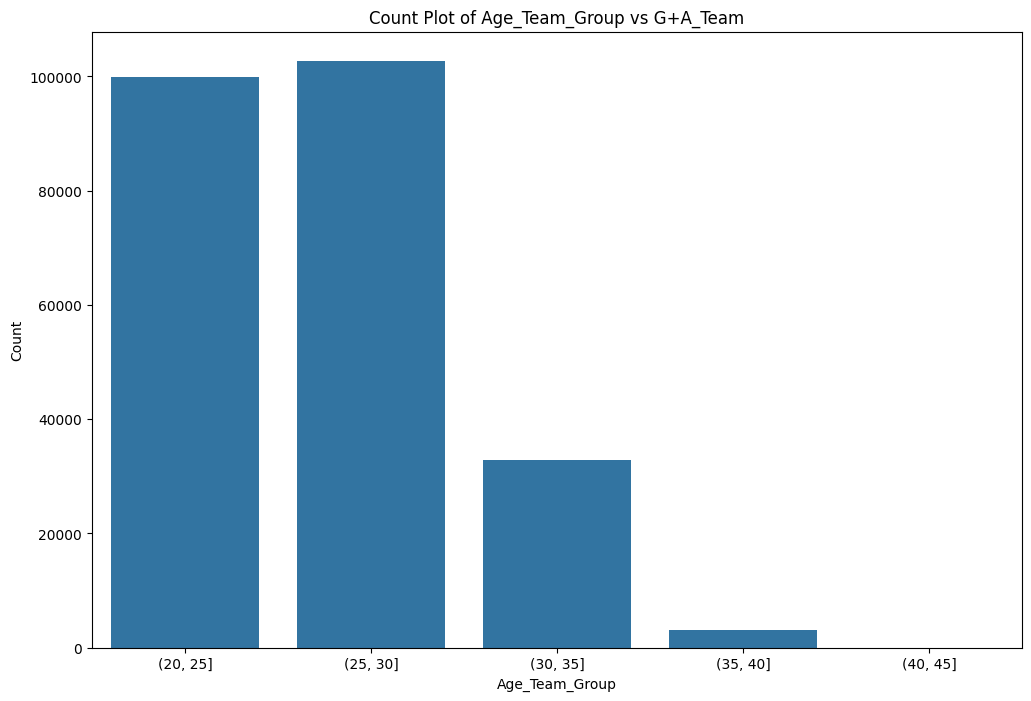

In [ ]:
plt.figure(figsize=(12, 8))
age_bins = [20, 25, 30, 35, 40, 45]
data['Age_Player_Group'] = pd.cut(data['Age_Player'], bins=age_bins)
grouped=data.groupby('Age_Player_Group')['G+A_Team'].sum()
sns.barplot(x=grouped.index,y=grouped.values)
plt.title('Count Plot of Age_Player_Group vs G+A_Team')
plt.xlabel('Age_Player_Group')
plt.ylabel('Count')
plt.show()

- The majority of assists and goals are conceded by players between the ages of 25 and 30, attributed to their higher athleticism and endurance. Their ability to cover more ground on the field enables them to create and capitalize on scoring opportunities, contributing significantly to both assists and goals conceded. This age group's combination of experience and physical prowess makes them formidable contributors to offensive and defensive play.


 We aim to identify which positions have a higher likelihood of hitting the target. By analyzing the data, we can pinpoint the positions that consistently generate more shots on target, providing valuable insights into the offensive effectiveness of different player roles.


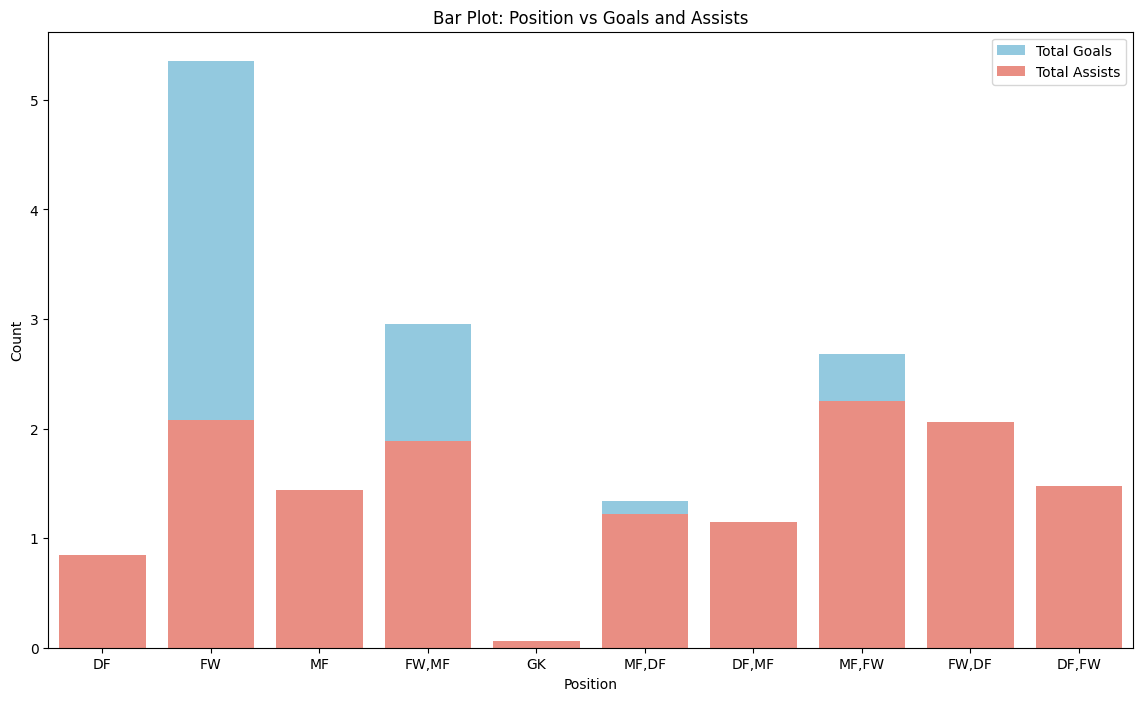

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='position', y='Gls_Player', data=data, ci=None, label='Total Goals', color='skyblue')
sns.barplot(x='position', y='Ast_Player', data=data, ci=None, label='Total Assists', color='salmon')
plt.title('Bar Plot: Position vs Goals and Assists')
plt.xlabel('Position')
plt.ylabel('Count')
plt.legend()
plt.show()


- The majority of goals and assists originate from the forward (FW) position, which is unsurprising given its proximity to the target. This natural advantage positions forwards closer to scoring opportunities, making them pivotal in driving offensive plays and contributing to goal-scoring opportunities for their team.


Our goal is to highlight the teams with the highest number of yellow and red cards, providing insights into their level of aggression on the field. By identifying these teams, we can gain a better understanding of their playing style and tactical approach, as well as their impact on match dynamics and disciplinary records.


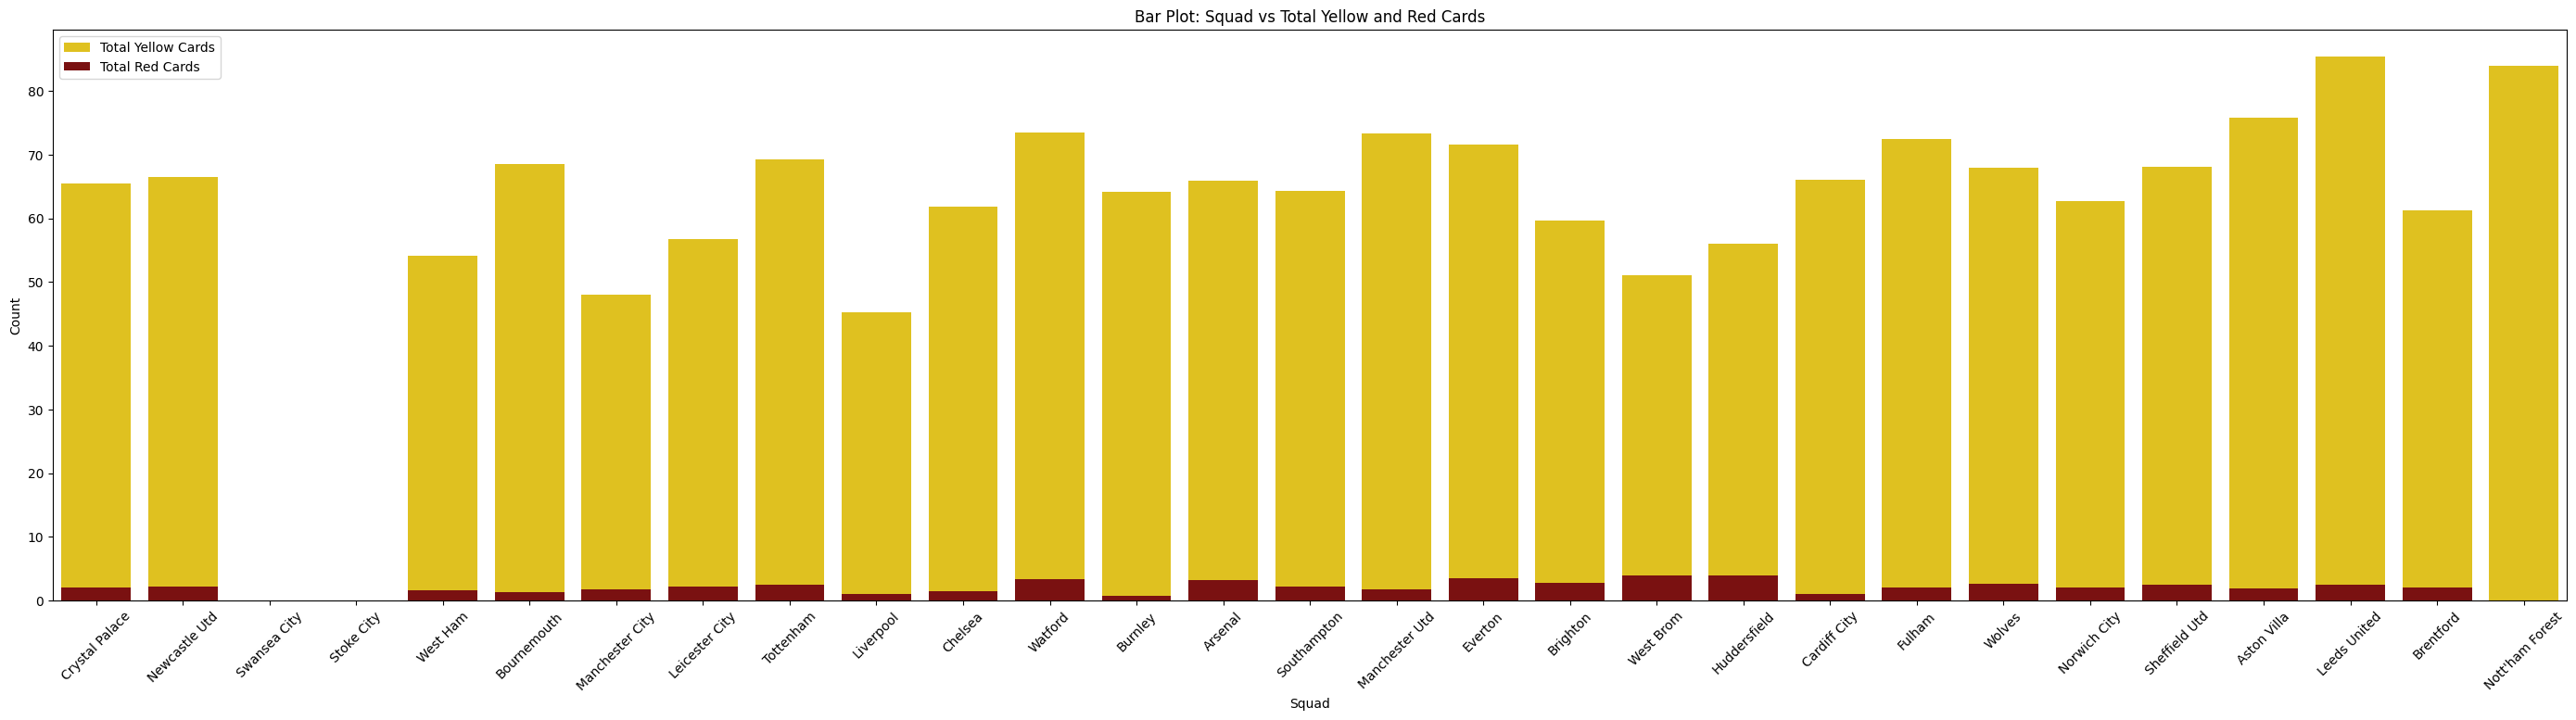

In [ ]:
# Selecting top few squads for visualization
top_squads = data['Squad'].value_counts().index

# Filtering the data
filtered_data_squad = data[data['Squad'].isin(top_squads)]

# Bar plot for Squad vs CrdY_Team and CrdR_Team
plt.figure(figsize=(35, 8))
sns.barplot(x='Squad', y='CrdY_Team', data=filtered_data_squad, ci=None, label='Total Yellow Cards', color='gold')
sns.barplot(x='Squad', y='CrdR_Team', data=filtered_data_squad, ci=None, label='Total Red Cards', color='darkred')
plt.title('Bar Plot: Squad vs Total Yellow and Red Cards')
plt.xlabel('Squad')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


- It's noteworthy that the majority of yellow and red cards are accumulated by teams facing relegation. This observation suggests a correlation between aggressive play and the intense pressure experienced by teams striving to avoid relegation. The heightened stakes may lead to more contentious matches and a greater propensity for disciplinary actions among these teams.


Our objective is to showcase the positions that receive the highest number of yellow and red cards, providing insights into the most aggressive player roles on the field. By identifying these positions, we can gain a deeper understanding of their involvement in physical play and tactical challenges, shedding light on the intensity and aggression associated with different player positions.


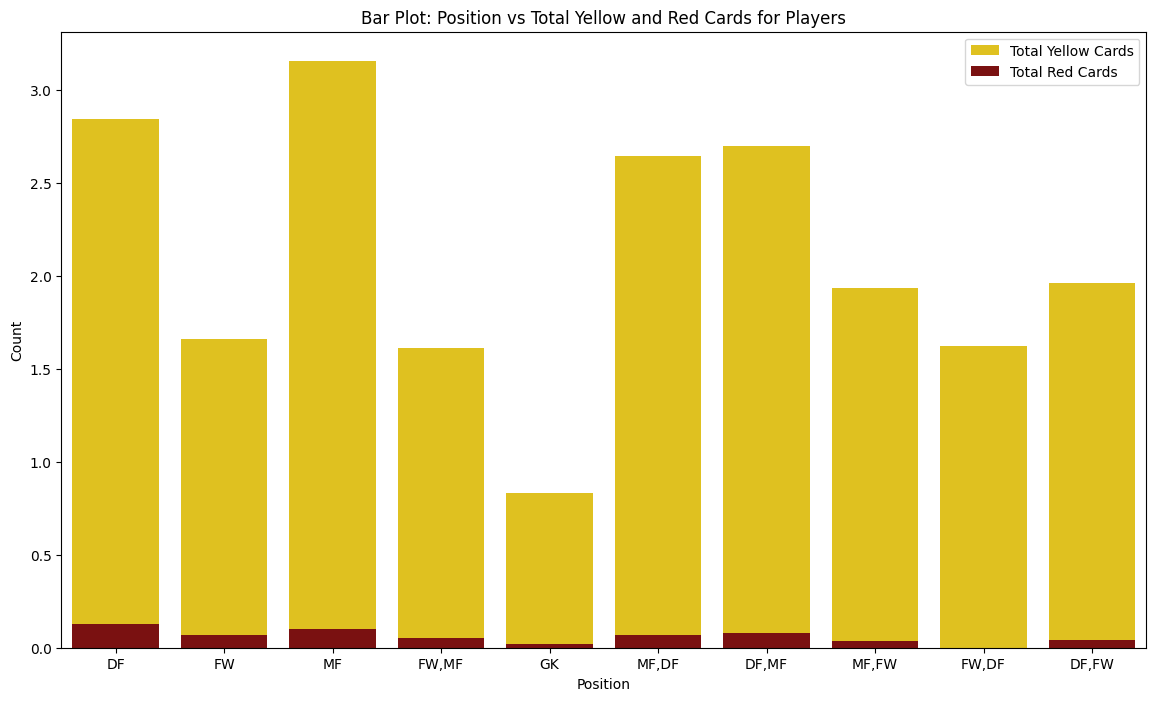

In [ ]:
# Selecting top few positions for visualization
top_positions_player = data['position'].value_counts().index

# Filtering the data
filtered_data_position = data[data['position'].isin(top_positions_player)]

# Bar plot for Position vs CrdY_Player and CrdR_Player
plt.figure(figsize=(14, 8))
sns.barplot(x='position', y='CrdY_Player', data=filtered_data_position, ci=None, label='Total Yellow Cards', color='gold')
sns.barplot(x='position', y='CrdR_Player', data=filtered_data_position, ci=None, label='Total Red Cards', color='darkred')
plt.title('Bar Plot: Position vs Total Yellow and Red Cards for Players')
plt.xlabel('Position')
plt.ylabel('Count')
plt.legend()
plt.show()


- Midfielders (MF) accumulate the highest number of yellow cards, attributed to their strategic role in executing tactical fouls to halt opposition counterattacks. Positioned strategically in the middle of the field, midfielders often resort to fouls to disrupt opponent momentum, earning them yellow cards in the process.

- Conversely, defenders (DF) top the list for red cards due to the nature of their defensive duties. Their fouls, aimed at preventing high expected goals situations, often result in more severe penalties, leading to red card sanctions. This defensive mindset underscores the importance of defenders in mitigating goal-scoring opportunities, albeit at the risk of disciplinary consequences.


Our aim is to identify the squads that generate the most chances, encompassing both goals and assists. By analyzing this data, we can pinpoint the teams that excel in offensive creativity and playmaking, offering valuable insights into their attacking prowess and effectiveness in creating goal-scoring opportunities.


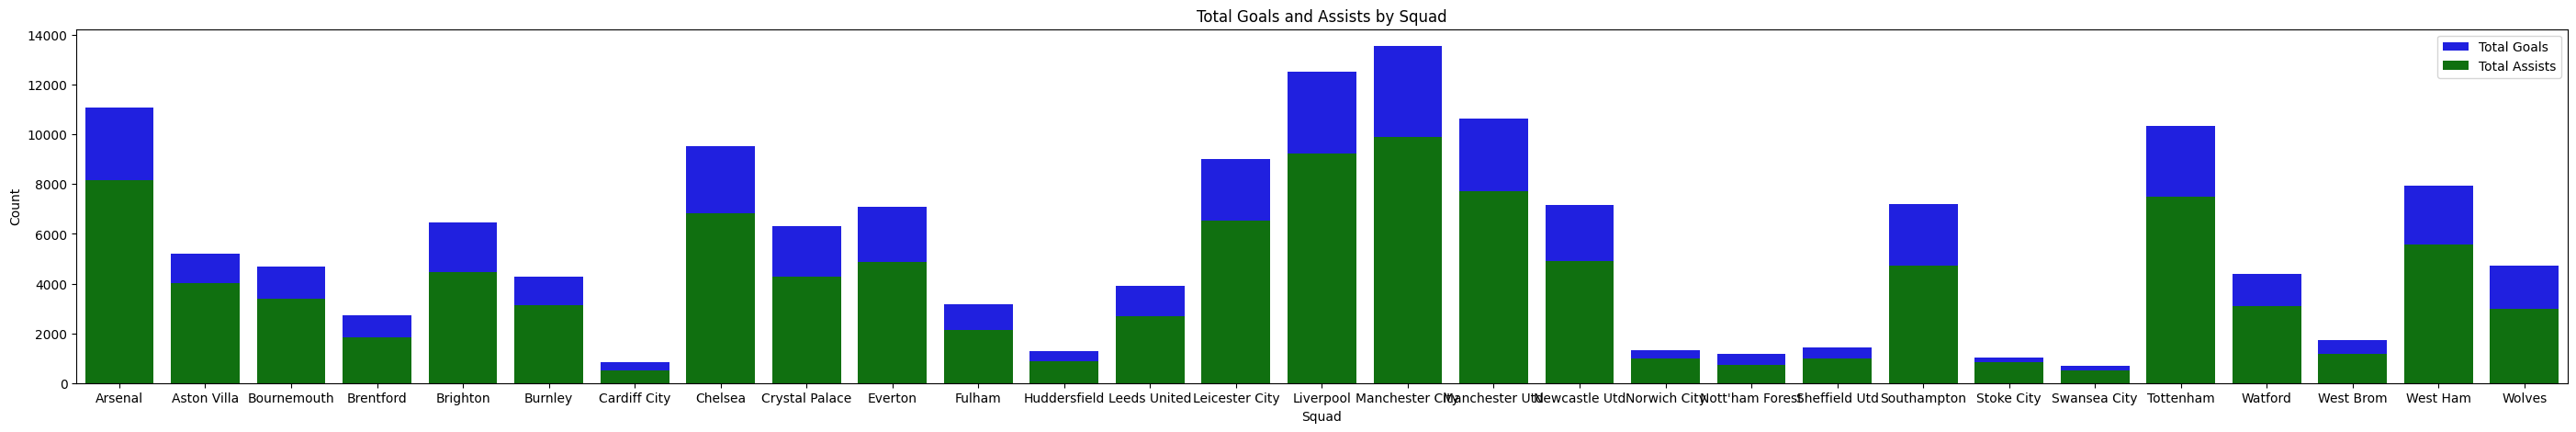

In [ ]:
# Aggregate total goals and assists by squad
team_goals_assists = data.groupby('Squad')['Gls_Team', 'Ast_Team'].sum().reset_index()

# Bar plot for Squad vs Total Goals and Assists
plt.figure(figsize=(35, 5))
sns.barplot(x='Squad', y='Gls_Team', data=team_goals_assists, color='blue', label='Total Goals')
sns.barplot(x='Squad', y='Ast_Team', data=team_goals_assists, color='green', label='Total Assists')

plt.title('Total Goals and Assists by Squad')
plt.xlabel('Squad')
plt.ylabel('Count')
plt.legend()
plt.show()


- The top six teams consistently lead in both goals and assists, driven by their perennial pursuit of titles and securing places in the UEFA Champions League (UCL). This relentless drive for success fosters a culture of high performance and ambition, reflected in their ability to consistently generate scoring opportunities and contribute to goal creation.


Our objective is to identify the squads that create the most chances, considering both expected goals and assists. By analyzing this data, we can pinpoint the teams that excel in generating high-quality scoring opportunities, providing valuable insights into their offensive capabilities and efficiency in creating goal-scoring chances.


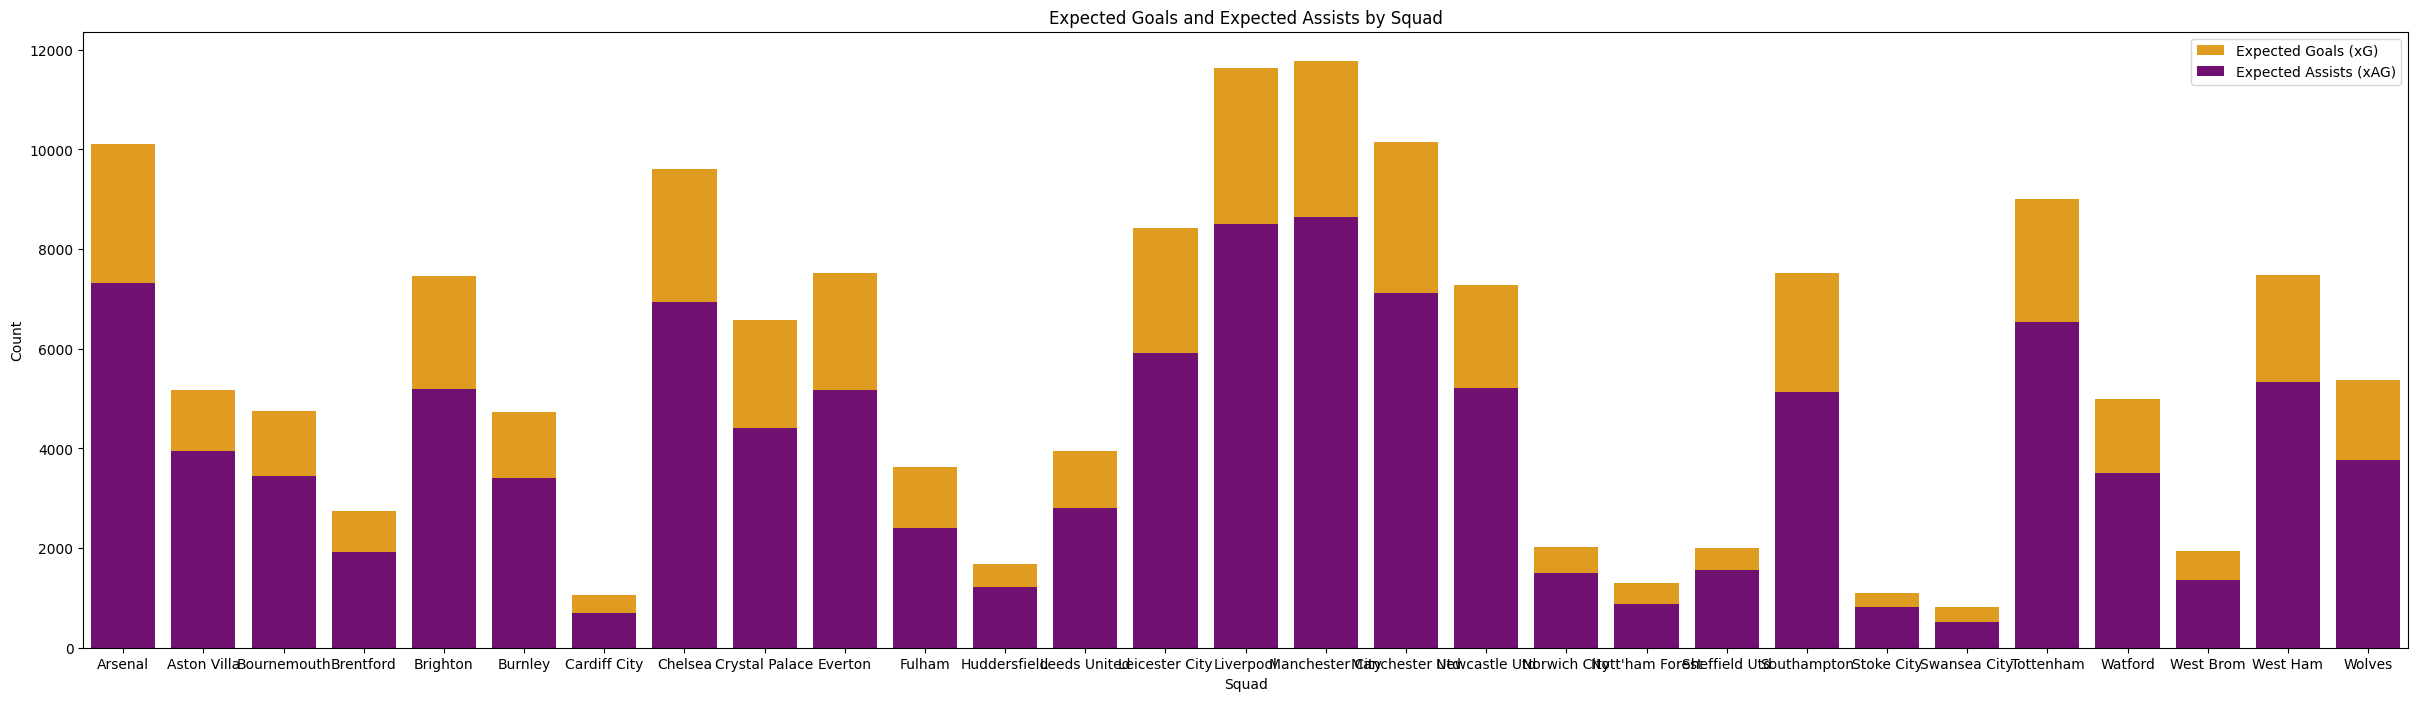

In [ ]:
# Aggregate expected goals and assists by squad
team_xgoals_xassists = data.groupby('Squad')['xG_Team', 'xAG_Team'].sum().reset_index()

# Bar plot for Squad vs Expected Goals and Expected Assists
plt.figure(figsize=(30, 8))
sns.barplot(x='Squad', y='xG_Team', data=team_xgoals_xassists, color='orange', label='Expected Goals (xG)')
sns.barplot(x='Squad', y='xAG_Team', data=team_xgoals_xassists, color='purple', label='Expected Assists (xAG)')

plt.title('Expected Goals and Expected Assists by Squad')
plt.xlabel('Squad')
plt.ylabel('Count')
plt.legend()
plt.show()


- The top six teams consistently lead in both Expected Goals (xG) and Expected Assists (xA), owing to the superior quality of players and the strength of their squads. With access to top-tier talent and robust team compositions, these teams possess the ability to consistently generate high-quality scoring opportunities and facilitate goal creation, underscoring their dominance


Our goal is to highlight positions with the highest number of penalty attempts, providing insights into the most aggressive player roles on the field. By identifying these positions, we can gain a deeper understanding of their involvement in attacking plays and their willingness to take risks in the penalty area, shedding light on the intensity and aggression associated with different player positions.


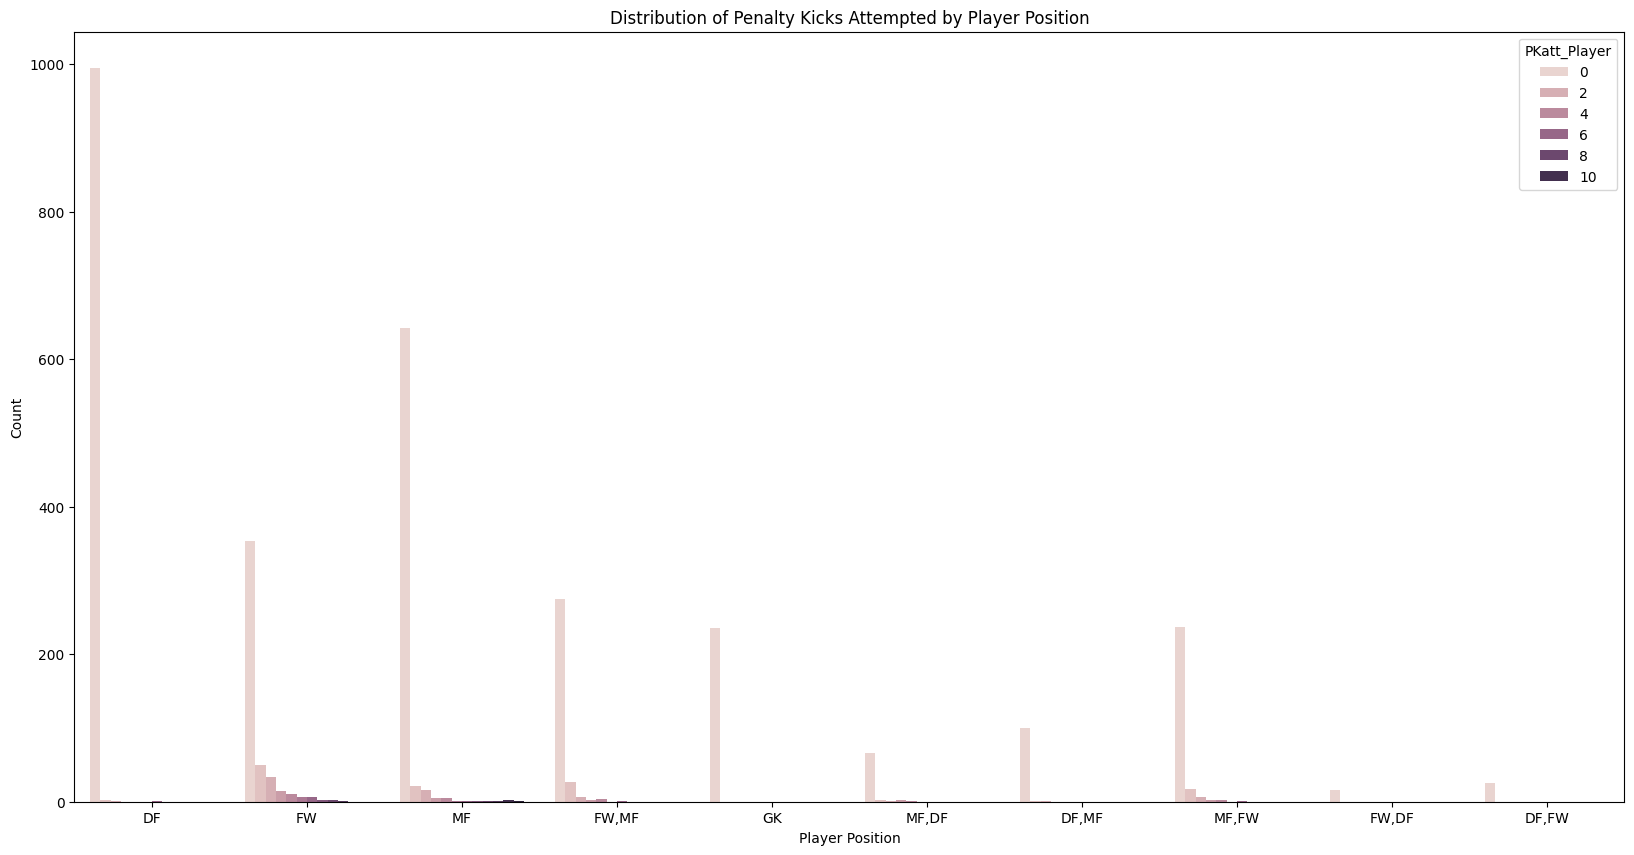

In [ ]:
# Creating a count plot
plt.figure(figsize=(20, 10))
sns.countplot(x='position', hue='PKatt_Player', data=data)
plt.title('Distribution of Penalty Kicks Attempted by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.show()


- Defenders (DF) top the list of positions with penalty kicks due to their proximity to the target while defending. Positioned closest to the goal, defenders often find themselves in situations where they need to make crucial tackles or blocks, increasing the likelihood of penalty incidents. Similarly, midfielders (MF) rank second in penalty attempts, as they also play a significant role in defensive duties near the goal, leading to penalty situations arising from challenges within the penalty area.


Our objective is to showcase teams with the highest number of penalty attempts, providing insights into the most aggressive teams on the field. By identifying these teams, we aim to gain a better understanding of their attacking intensity and willingness to take risks in the penalty area, shedding light on their aggressive playing style and offensive tactics.


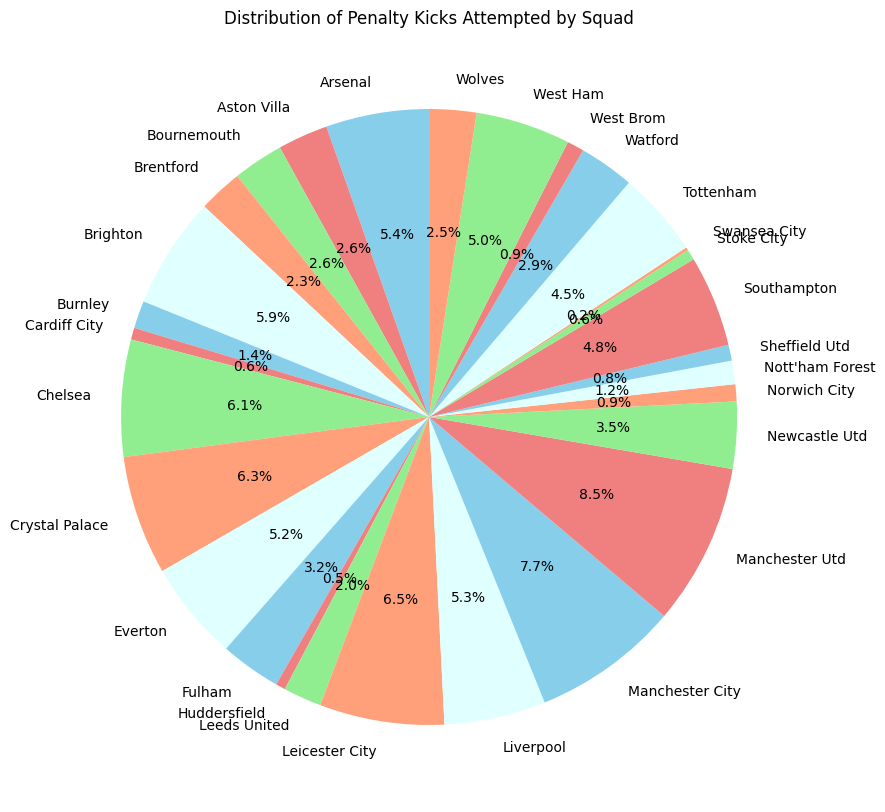

In [ ]:
import matplotlib.pyplot as plt

# Selecting top few squads for visualization
top_squads = data['Squad'].value_counts().nlargest(29).index

# Filtering the data
filtered_data = data[data['Squad'].isin(top_squads)]

# Calculating total penalty kicks attempted for each squad
total_pkatt_by_squad = filtered_data.groupby('Squad')['PKatt_Team'].sum()

# Creating a pie chart
plt.figure(figsize=(10, 10))
plt.pie(total_pkatt_by_squad, labels=total_pkatt_by_squad.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightcyan'])
plt.title('Distribution of Penalty Kicks Attempted by Squad')
plt.show()


- Manchester United is consistently the team with the highest number of penalty kicks attempted, largely owing to their aggressive playing style. Known for their attacking prowess and relentless pressure in the opposition's penalty area, Manchester United frequently finds themselves in situations where penalty kicks are awarded, reflecting their aggressive approach to scoring goals.


we attempt to show the positions controlling the tempo of the field.

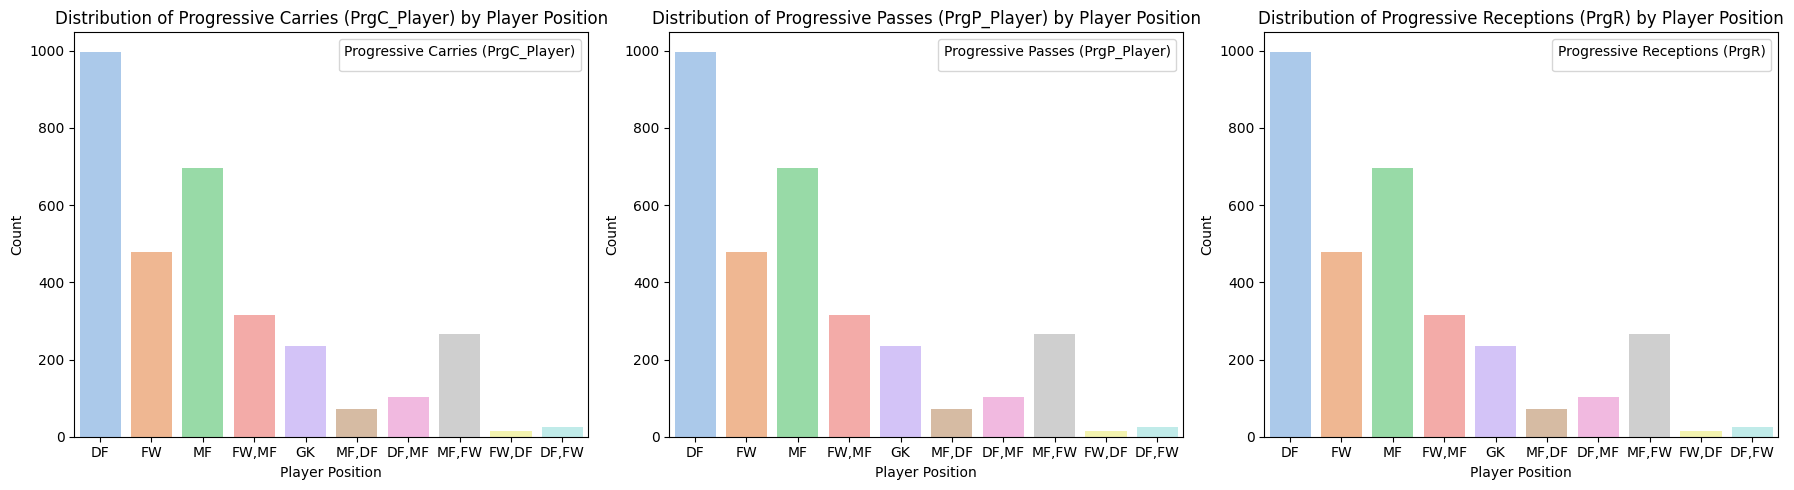

In [ ]:
# Selecting relevant columns
selected_columns = ['PrgC_Player', 'PrgP_Player', 'PrgR', 'position']

# Filtering out rows with missing values in selected columns
filtered_data = data[selected_columns].dropna()

# Creating count plots for PrgC_Player, PrgP_Player, and PrgR
plt.figure(figsize=(18, 5))

# Count plot for PrgC_Player
plt.subplot(1, 3, 1)
sns.countplot(x='position', data=filtered_data, palette='pastel')
plt.title('Distribution of Progressive Carries (PrgC_Player) by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.legend(title='Progressive Carries (PrgC_Player)')

# Count plot for PrgP_Player
plt.subplot(1, 3, 2)
sns.countplot(x='position', data=filtered_data, palette='pastel')
plt.title('Distribution of Progressive Passes (PrgP_Player) by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.legend(title='Progressive Passes (PrgP_Player)')

# Count plot for PrgR
plt.subplot(1, 3, 3)
sns.countplot(x='position', data=filtered_data, palette='pastel')
plt.title('Distribution of Progressive Receptions (PrgR) by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.legend(title='Progressive Receptions (PrgR)')

plt.tight_layout()
plt.show()



- DF is the position that controles the tiempo of the field

we attempt to show the teams with the highest possesion


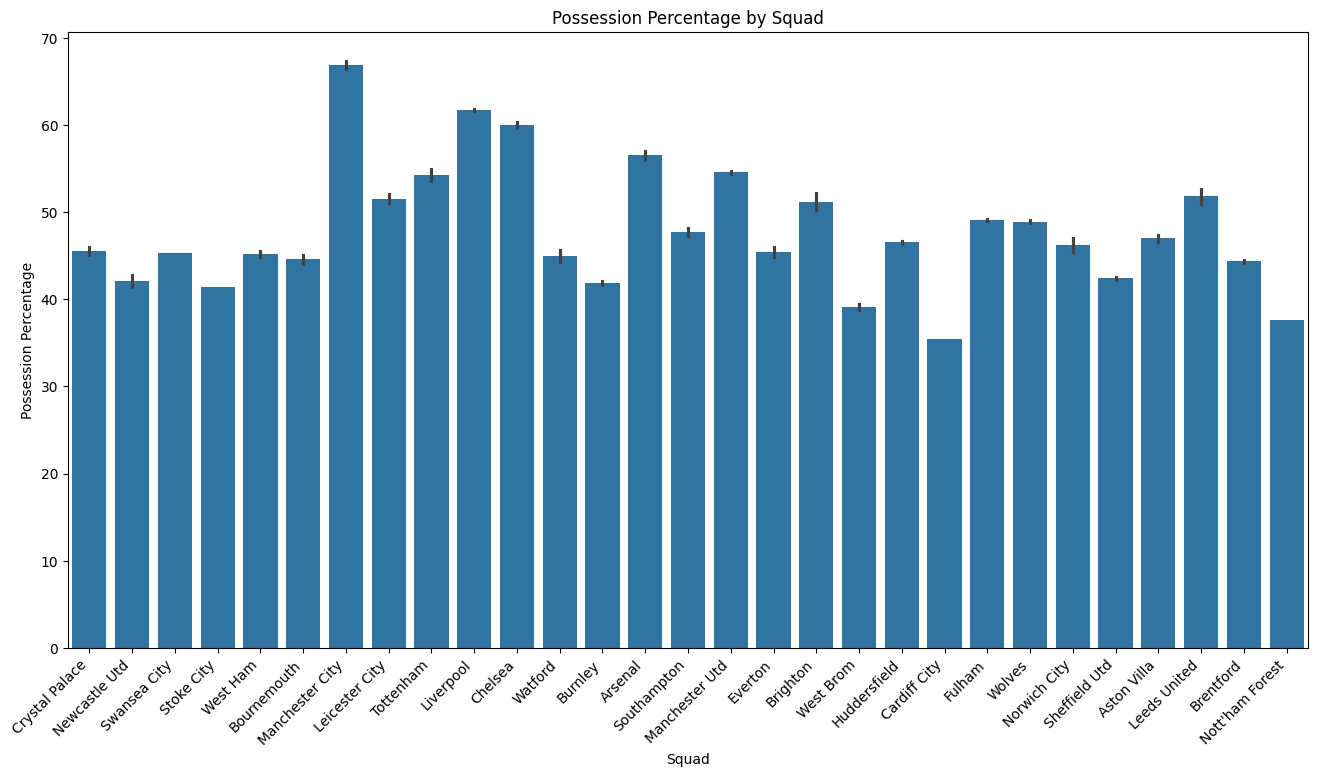

In [ ]:
# Creating a bar plot
plt.figure(figsize=(16, 8))
sns.barplot(x='Squad', y='Poss', data=data)
plt.title('Possession Percentage by Squad')
plt.xlabel('Squad')
plt.ylabel('Possession Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()




- posession relays on the style of the team and their tactics,while man city is the highest percentage of posession in the PL because their style is all about passing around the field(tikki-taka)

we attempt to show the position scoring most penalty kicks

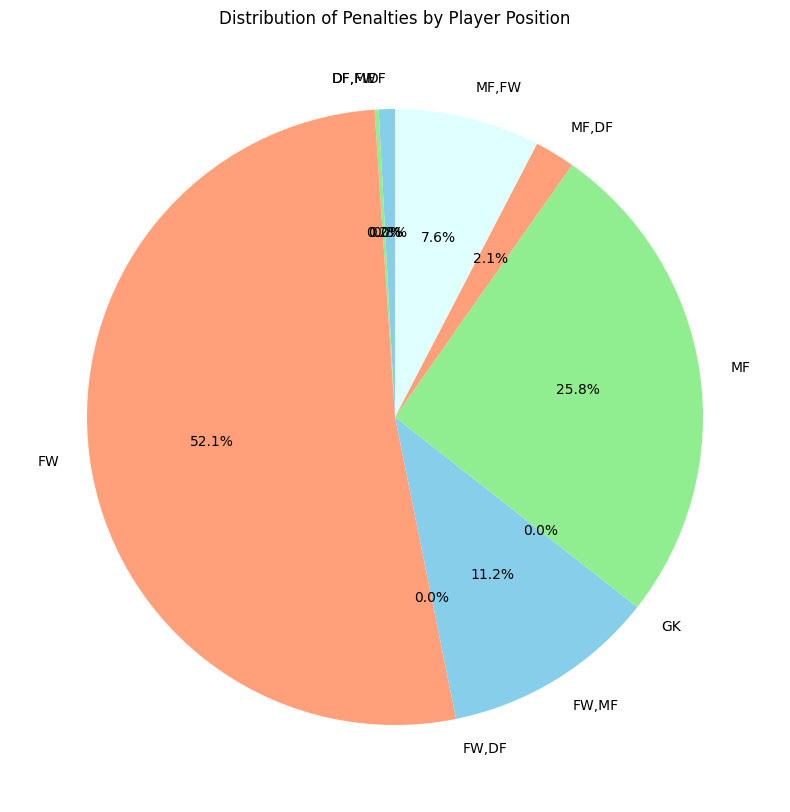

In [ ]:
# Calculate the total penalties for each position
total_penalties_by_position = data.groupby('position')['PK_Player'].sum()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(total_penalties_by_position, labels=total_penalties_by_position.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightcyan'])
plt.title('Distribution of Penalties by Player Position')
plt.show()



- FW has the highest percentage of scoring penalties because this position has the highest sense of scoring and has the best ability of finishing

In [ ]:
data.drop(['Age_Group'],axis=1,inplace=True)

##[2] Preprocessing

### 2.1) Data Format

Searching for player names that do not contain alphabetical characters. By identifying such names, we aim to pinpoint any anomalies or irregularities in the dataset, helping ensure its accuracy and completeness.


In [ ]:
import re

pattern = re.compile(r'[^a-zA-Z\s]')

names_with_non_alphabetical_chars = data[data['player name'].str.contains(pattern, na=False)]

print("Names containing non-alphabetical characters:")
names_with_non_alphabetical_chars['player name'].unique()

Names containing non-alphabetical characters:


array(['Lee Chung-yong', 'Timothy Fosu-Mensah', 'Ruben Loftus-Cheek',
       'Luka Milivojević', 'Jaïro Riedewald', 'Pape Souaré',
       'Julián Speroni', 'Alexander Sørloth', 'Aaron Wan-Bissaka',
       'Mohamed Diamé', 'Martin Dúbravka', 'Jesús Gámez',
       'Massadio Haïdara', 'Aleksandar Mitrović', 'Ayoze Pérez',
       'André Ayew', 'Łukasz Fabiański', 'Federico Fernández',
       'Àngel Rangel', 'Ki Sung-yueng', 'Jesé', 'Bojan Krkić',
       'Eric Maxim Choupo-Moting', 'Lasse Sørensen', 'Adrián',
       'Marko Arnautović', 'José Fonte', 'Javier Hernández',
       'Cheikhou Kouyaté', 'João Mário', 'Nathan Aké', 'Asmir Begović',
       'Sergio Agüero', 'Brahim Díaz', 'İlkay Gündoğan',
       'Nicolás Otamendi', 'Leroy Sané', 'Yaya Touré', 'Fousseni Diabaté',
       'Aleksandar Dragović', 'Eldin Jakupović', 'Mousa Dembélé',
       'Son Heung-min', 'Érik Lamela', "Georges-Kévin N'Koudou",
       'Davinson Sánchez', 'Kyle Walker-Peters', 'Trent Alexander-Arnold',
       'Marko Gruji

- Many players' names contain the character `?`. This observation prompts further investigation into the dataset, as it may indicate inconsistencies or anomalies that require attention to ensure data accuracy and completeness.


 We're conducting an investigation into player names containing the character `?`. This inquiry aims to identify any irregularities or anomalies in the dataset, enabling us to address potential data quality issues and ensure the accuracy and completeness of the information.


In [ ]:
data[data['player name'].str.contains('\?')]

,rank,player name,nationality,position,Squad,Age_Player,Born,MP_Player,starts,Min_Player,90s_Player,Gls_Player,Ast_Player,G+A_Player,G-PK_Player,PK_Player,PKatt_Player,CrdY_Player,CrdR_Player,xG_Player,npxG_Player,xAG_Player,npxg+xag,PrgC_Player,PrgP_Player,PrgR,Gls/90_Player,Ast/90_Player,Gls+Ast/90_Player,G-PK/90_Player,G+Ast-PK/90_Player,xG/90_Player,xAG/90_Player,xG+xAG/90_Player,npxG/90_Player,npxG+xAG/90_Player,Season,#Pl,Age_Team,Poss,MP_Team,Starts,Min_Team,90s_Team,Gls_Team,Ast_Team,G+A_Team,G-PK_Team,PK_Team,PKatt_Team,CrdY_Team,CrdR_Team,xG_Team,npxG_Team,xAG_Team,npxG+xAG,PrgC_Team,PrgP_Team,Gls/90_Team,Ast/90_Team,Gls+Ast/90_Team,G-PK/90_Team,G+Ast-PK/90_Team,xG/90_Team,xAG/90_Team,xG+xAG/90_Team,npxG/90_Team,npxG+xAG/90_Team
2665,555,Maximilian W?ber,at AUT,DF,Leeds United,24,1998,16,14,"1,266",14.1,0,0,0,0,0,0,3,0.0,0.7,0.7,0.6,1.4,15.0,54.0,15.0,0.00,0.00,0.00,0.00,0.00,0.05,0.05,0.10,0.05,0.10,2022-2023,29,25.3,47.0,38,418,"3,420",38.0,45,31,76,44,1,3,89.0,3.0,47.4,45.0,31.9,76.9,555,1429,1.18,0.82,2.00,1.16,1.97,1.25,0.84,2.09,1.18,2.02
2681,295,Cl?ment Lenglet,fr FRA,DF,Tottenham,27,1995,26,24,"2,019",22.4,0,2,2,0,0,0,4,0.0,1.0,1.0,0.6,1.6,33.0,85.0,7.0,0.00,0.09,0.09,0.00,0.09,0.04,0.03,0.07,0.04,0.07,2022-2023,29,27.6,50.0,38,418,"3,420",38.0,68,46,114,63,5,6,77.0,3.0,57.1,52.4,43.1,95.5,692,1449,1.79,1.21,3.00,1.66,2.87,1.50,1.13,2.64,1.38,2.51
2685,407,Ivan Peri?i?,hr CRO,"DF,MF",Tottenham,33,1989,34,23,"2,108",23.4,1,8,9,1,0,0,6,0.0,2.6,2.6,6.1,8.8,87.0,61.0,181.0,0.04,0.34,0.38,0.04,0.38,0.11,0.26,0.37,0.11,0.37,2022-2023,29,27.6,50.0,38,418,"3,420",38.0,68,46,114,63,5,6,77.0,3.0,57.1,52.4,43.1,95.5,692,1449,1.79,1.21,3.00,1.66,2.87,1.50,1.13,2.64,1.38,2.51
2706,78,Duje ?aleta-Car,hr CRO,DF,Southampton,25,1996,13,9,946,10.5,1,0,1,1,0,0,2,0.0,0.8,0.8,0.0,0.8,5.0,33.0,0.0,0.10,0.00,0.10,0.10,0.10,0.08,0.00,0.08,0.08,0.08,2022-2023,36,24.7,44.5,38,418,"3,420",38.0,36,25,61,34,2,4,73.0,0.0,37.7,34.5,28.2,62.7,588,1125,0.95,0.66,1.61,0.89,1.55,0.99,0.74,1.73,0.91,1.65
2713,292,Rom?o Lavia,be BEL,MF,Southampton,18,2004,29,26,"2,221",24.7,1,0,1,1,0,0,9,0.0,0.4,0.4,0.6,1.0,22.0,102.0,14.0,0.04,0.00,0.04,0.04,0.04,0.02,0.03,0.04,0.02,0.04,2022-2023,36,24.7,44.5,38,418,"3,420",38.0,36,25,61,34,2,4,73.0,0.0,37.7,34.5,28.2,62.7,588,1125,0.95,0.66,1.61,0.89,1.55,0.99,0.74,1.73,0.91,1.65
2720,391,Mislav Or?i?,hr CRO,MF,Southampton,29,1992,1,0,7,0.1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022-2023,36,24.7,44.5,38,418,"3,420",38.0,36,25,61,34,2,4,73.0,0.0,37.7,34.5,28.2,62.7,588,1125,0.95,0.66,1.61,0.89,1.55,0.99,0.74,1.73,0.91,1.65
2742,311,Sa?a Luki?,rs SRB,MF,Fulham,25,1996,12,4,412,4.6,0,0,0,0,0,0,1,0.0,0.1,0.1,0.0,0.1,8.0,13.0,5.0,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.03,0.03,0.03,2022-2023,29,28.2,48.8,38,418,"3,420",38.0,52,33,85,47,5,9,80.0,1.0,46.2,39.1,28.5,67.7,662,1326,1.37,0.87,2.24,1.24,2.11,1.22,0.75,1.97,1.03,1.78
2744,357,Aleksandar Mitrovi?,rs SRB,FW,Fulham,27,1994,24,23,"2,008",22.3,14,1,15,10,4,8,7,0.0,14.9,8.6,2.3,10.9,24.0,44.0,97.0,0.63,0.04,0.67,0.45,0.49,0.67,0.10,0.77,0.39,0.49,2022-2023,29,28.2,48.8,38,418,"3,420",38.0,52,33,85,47,5,9,80.0,1.0,46.2,39.1,28.5,67.7,662,1326,1.37,0.87,2.24,1.24,2.11,1.22,0.75,1.97,1.03,1.78
2753,484,C?dric Soares,pt POR,DF,Fulham,30,1991,6,2,198,2.2,0,0,0,0,0,0,0,0.0,0.1,0.1,0.3,0.4,4.0,12.0,12.0,0.00,0.00,0.00,0.00,0.00,0.03,0.13,0.16,0.03,0.16,2022-2023,29,28.2,48.8,38,418,"3,420",38.0,52,33,85,47,5,9,80.0,1.0,46.2,39.1,28.5,67.7,662,1326,1.37,0.87,2.24,1.24,2.11,1.22,0.75,1.97,1.03,1.78
2771,167,?ukasz Fabia?ski,pl POL,GK,West Ham,37,1985,36,36,"3,111",34.6,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022-2023,25,28.2,42.1,38,418,"3,420",38.0,41,25,66,35,6,8,44.0,0.0,49.2,43.7,32.7,76.4,615,1274,1.08,0.66,1.74,0.92,1.58,1.29,0.86,2.15,1.15,2.01


- The presence of the character `?` in some player names might be due to the inclusion of non-English characters. This possibility prompts further examination of the dataset to ensure accurate representation and handling of names with special characters.


Correcting erroneous names by replacing them with their accurate counterparts. This process ensures the integrity and accuracy of the dataset, facilitating more reliable analysis and interpretation of player information.


In [ ]:
data['player name'].iloc[2665]='Maximilian Wöber'
data['player name'].iloc[2681]='Clément Lenglet'
data['player name'].iloc[2685]='Ivan Perišić'
data['player name'].iloc[2706]='Duje Ćaleta-Car'
data['player name'].iloc[2713]='Roméo Lavia'
data['player name'].iloc[2720]='Mislav Oršić'
data['player name'].iloc[2742]='Saša Lukić'
data['player name'].iloc[2744]='Aleksandar Mitrović'
data['player name'].iloc[2753]='Cédric Soares'
data['player name'].iloc[2771]='Łukasz Fabiański'
data['player name'].iloc[2783]='Tomáš Souček'
data['player name'].iloc[2789]='Cheick Doucouré'
data['player name'].iloc[2794]='Marc Guéhi'
data['player name'].iloc[2799]='Luka Milivojević'
data['player name'].iloc[2827]='Raúl Jiménez'
data['player name'].iloc[2838]='José Sá'
data['player name'].iloc[2840]='Nélson Semedo'
data['player name'].iloc[2841]='Adama Traoré'
data['player name'].iloc[2842]='Boubacar Traoré'
data['player name'].iloc[2849]='Halil Dervişoğlu'
data['player name'].iloc[2869]='Nathan Aké'
data['player name'].iloc[2879]='İlkay Gündoğan'
data['player name'].iloc[2910]='Ayoze Pérez'
data['player name'].iloc[2912]='Boubakary Soumaré'
data['player name'].iloc[2914]='Çağlar Söyüncü'
data['player name'].iloc[2938]='Ibrahima Konaté'
data['player name'].iloc[2949]='Asmir Begović'
data['player name'].iloc[2953]='Séamus Coleman'
data['player name'].iloc[2955]='Abdoulaye Doucouré'
data['player name'].iloc[2996]='Fabian Schär'
data['player name'].iloc[3009]='Siriki Dembélé'
data['player name'].iloc[3044]='Victor Lindelöf'
data['player name'].iloc[3083]='Bertrand Traoré'
data['player name'].iloc[3088]='César Azpilicueta'
data['player name'].iloc[3096]='João Félix'
data['player name'].iloc[3105]="N'Golo Kanté"
data['player name'].iloc[3107]="Mateo Kovačić"
data['player name'].iloc[3120]="André Ayew"
data['player name'].iloc[3134]="Cheikhou Kouyaté"
data['player name'].iloc[3153]="Moisés Caicedo"
data['player name'].iloc[3153]="Moisés Caicedo"
data['player name'].iloc[3154]="Julio Enciso"
data['player name'].iloc[3197]="Cédric Soares"

Verifying that all player names do not contain the `?` character. This check ensures data consistency and accuracy, helping to identify and address any anomalies or irregularities in the dataset.


In [ ]:
data[data['player name'].str.contains('\?')]

,rank,player name,nationality,position,Squad,Age_Player,Born,MP_Player,starts,Min_Player,90s_Player,Gls_Player,Ast_Player,G+A_Player,G-PK_Player,PK_Player,PKatt_Player,CrdY_Player,CrdR_Player,xG_Player,npxG_Player,xAG_Player,npxg+xag,PrgC_Player,PrgP_Player,PrgR,Gls/90_Player,Ast/90_Player,Gls+Ast/90_Player,G-PK/90_Player,G+Ast-PK/90_Player,xG/90_Player,xAG/90_Player,xG+xAG/90_Player,npxG/90_Player,npxG+xAG/90_Player,Season,#Pl,Age_Team,Poss,MP_Team,Starts,Min_Team,90s_Team,Gls_Team,Ast_Team,G+A_Team,G-PK_Team,PK_Team,PKatt_Team,CrdY_Team,CrdR_Team,xG_Team,npxG_Team,xAG_Team,npxG+xAG,PrgC_Team,PrgP_Team,Gls/90_Team,Ast/90_Team,Gls+Ast/90_Team,G-PK/90_Team,G+Ast-PK/90_Team,xG/90_Team,xAG/90_Team,xG+xAG/90_Team,npxG/90_Team,npxG+xAG/90_Team


In [ ]:
data.head()

,rank,player name,nationality,position,Squad,Age_Player,Born,MP_Player,starts,Min_Player,90s_Player,Gls_Player,Ast_Player,G+A_Player,G-PK_Player,PK_Player,PKatt_Player,CrdY_Player,CrdR_Player,xG_Player,npxG_Player,xAG_Player,npxg+xag,PrgC_Player,PrgP_Player,PrgR,Gls/90_Player,Ast/90_Player,Gls+Ast/90_Player,G-PK/90_Player,G+Ast-PK/90_Player,xG/90_Player,xAG/90_Player,xG+xAG/90_Player,npxG/90_Player,npxG+xAG/90_Player,Season,#Pl,Age_Team,Poss,MP_Team,Starts,Min_Team,90s_Team,Gls_Team,Ast_Team,G+A_Team,G-PK_Team,PK_Team,PKatt_Team,CrdY_Team,CrdR_Team,xG_Team,npxG_Team,xAG_Team,npxG+xAG,PrgC_Team,PrgP_Team,Gls/90_Team,Ast/90_Team,Gls+Ast/90_Team,G-PK/90_Team,G+Ast-PK/90_Team,xG/90_Team,xAG/90_Team,xG+xAG/90_Team,npxG/90_Team,npxG+xAG/90_Team
0,1,Patrick van Aanholt,nl,DF,Crystal Palace,26,1990,28,25,"2,184",24.3,5,1,6,5,0,0,7,0.0,3.1,3.1,2.1,5.2,46.0,92.0,86.0,0.21,0.04,0.25,0.21,0.25,0.13,0.09,0.21,0.13,0.21,2017-2018,28,27.1,45.2,38,418,"3,420",38.0,44,26,70,36,8,10,NaN,NaN,53.5,45.9,33.3,79.2,727,1308,1.16,0.68,1.84,0.95,1.63,1.41,0.88,2.28,1.21,2.08
1,48,Christian Benteke,be,FW,Crystal Palace,26,1990,31,24,"2,240",24.9,3,5,8,2,1,2,6,0.0,10.2,8.6,2.9,11.5,18.0,42.0,133.0,0.12,0.20,0.32,0.08,0.28,0.41,0.12,0.53,0.34,0.46,2017-2018,28,27.1,45.2,38,418,"3,420",38.0,44,26,70,36,8,10,NaN,NaN,53.5,45.9,33.3,79.2,727,1308,1.16,0.68,1.84,0.95,1.63,1.41,0.88,2.28,1.21,2.08
2,72,Yohan Cabaye,fr,MF,Crystal Palace,31,1986,31,28,"2,376",26.4,0,1,1,0,0,0,7,0.0,2.3,2.3,4.1,6.4,13.0,138.0,37.0,0.00,0.04,0.04,0.00,0.04,0.09,0.15,0.24,0.09,0.24,2017-2018,28,27.1,45.2,38,418,"3,420",38.0,44,26,70,36,8,10,NaN,NaN,53.5,45.9,33.3,79.2,727,1308,1.16,0.68,1.84,0.95,1.63,1.41,0.88,2.28,1.21,2.08
3,92,Lee Chung-yong,kr,"FW,MF",Crystal Palace,29,1988,7,1,135,1.5,0,0,0,0,0,0,0,0.0,0.0,0.0,0.1,0.1,4.0,2.0,16.0,0.00,0.00,0.00,0.00,0.00,0.02,0.05,0.07,0.02,0.07,2017-2018,28,27.1,45.2,38,418,"3,420",38.0,44,26,70,36,8,10,NaN,NaN,53.5,45.9,33.3,79.2,727,1308,1.16,0.68,1.84,0.95,1.63,1.41,0.88,2.28,1.21,2.08
4,111,Scott Dann,eng,DF,Crystal Palace,30,1987,17,16,"1,435",15.9,1,0,1,1,0,0,4,0.0,2.3,2.3,0.2,2.5,7.0,42.0,3.0,0.06,0.00,0.06,0.06,0.06,0.14,0.01,0.16,0.14,0.16,2017-2018,28,27.1,45.2,38,418,"3,420",38.0,44,26,70,36,8,10,NaN,NaN,53.5,45.9,33.3,79.2,727,1308,1.16,0.68,1.84,0.95,1.63,1.41,0.88,2.28,1.21,2.08


Refining the dataset by removing surplus columns, particularly those that are redundant or derived from other columns through aggregation or calculation. This refinement aims to simplify the dataset's structure, reducing complexity and improving its suitability for analysis and interpretation.


In [ ]:
data.drop(['rank','#Pl','Age_Team','Starts','MP_Team','Min_Team','90s_Team','Born','G+A_Player','G-PK_Player','npxG_Player','xAG_Player','Gls/90_Player','Ast/90_Player','xG/90_Player','xG+xAG/90_Player','npxG/90_Player','Gls_Team','Ast_Team','G-PK_Team','npxG_Team','xAG_Team','Gls/90_Team','Ast/90_Team','xG/90_Team','xAG/90_Team','npxG/90_Team'],axis=1,inplace=True)

Conducting a verification process to ensure that the unnecessary columns have been successfully removed from the dataset. This check confirms that the dataset has been streamlined as intended, reducing complexity and improving its suitability for analysis and interpretation.


In [ ]:
data.head()

,player name,nationality,position,Squad,Age_Player,MP_Player,starts,Min_Player,90s_Player,Gls_Player,Ast_Player,PK_Player,PKatt_Player,CrdY_Player,CrdR_Player,xG_Player,npxg+xag,PrgC_Player,PrgP_Player,PrgR,Gls+Ast/90_Player,G-PK/90_Player,G+Ast-PK/90_Player,xAG/90_Player,npxG+xAG/90_Player,Season,Poss,G+A_Team,PK_Team,PKatt_Team,CrdY_Team,CrdR_Team,xG_Team,npxG+xAG,PrgC_Team,PrgP_Team,Gls+Ast/90_Team,G-PK/90_Team,G+Ast-PK/90_Team,xG+xAG/90_Team,npxG+xAG/90_Team
0,Patrick van Aanholt,nl,DF,Crystal Palace,26,28,25,"2,184",24.3,5,1,0,0,7,0.0,3.1,5.2,46.0,92.0,86.0,0.25,0.21,0.25,0.09,0.21,2017-2018,45.2,70,8,10,NaN,NaN,53.5,79.2,727,1308,1.84,0.95,1.63,2.28,2.08
1,Christian Benteke,be,FW,Crystal Palace,26,31,24,"2,240",24.9,3,5,1,2,6,0.0,10.2,11.5,18.0,42.0,133.0,0.32,0.08,0.28,0.12,0.46,2017-2018,45.2,70,8,10,NaN,NaN,53.5,79.2,727,1308,1.84,0.95,1.63,2.28,2.08
2,Yohan Cabaye,fr,MF,Crystal Palace,31,31,28,"2,376",26.4,0,1,0,0,7,0.0,2.3,6.4,13.0,138.0,37.0,0.04,0.00,0.04,0.15,0.24,2017-2018,45.2,70,8,10,NaN,NaN,53.5,79.2,727,1308,1.84,0.95,1.63,2.28,2.08
3,Lee Chung-yong,kr,"FW,MF",Crystal Palace,29,7,1,135,1.5,0,0,0,0,0,0.0,0.0,0.1,4.0,2.0,16.0,0.00,0.00,0.00,0.05,0.07,2017-2018,45.2,70,8,10,NaN,NaN,53.5,79.2,727,1308,1.84,0.95,1.63,2.28,2.08
4,Scott Dann,eng,DF,Crystal Palace,30,17,16,"1,435",15.9,1,0,0,0,4,0.0,2.3,2.5,7.0,42.0,3.0,0.06,0.06,0.06,0.01,0.16,2017-2018,45.2,70,8,10,NaN,NaN,53.5,79.2,727,1308,1.84,0.95,1.63,2.28,2.08


Conducting an inspection to identify unique values in the 'start' column. This check aims to uncover any anomalies or irregularities in the data, providing valuable insights into the diversity and distribution of start positions across the dataset.


In [ ]:
data['starts'].unique()

array(['25', '24', '28', '1', '16', '17', '27', '0', '12', '21', '35',
       '6', '4', '18', '11', '7', '19', '10', '23', '15', '13', '32',
       '20', '14', '31', '33', '2', '8', '38', '30', '9', '5', '34', '36',
       '3', '26', '37', '22', '29', ',344'], dtype=object)

- We've detected a value containing a comma (`,`). This observation prompts further investigation into the dataset, as it may indicate anomalies or irregularities that require attention to ensure data integrity and consistency.


Conducting a check to identify values containing commas (`,`). This inspection aims to locate any instances of data irregularities or formatting issues, ensuring the accuracy and consistency of the dataset.


In [ ]:
data[data['starts']==',344']

,player name,nationality,position,Squad,Age_Player,MP_Player,starts,Min_Player,90s_Player,Gls_Player,Ast_Player,PK_Player,PKatt_Player,CrdY_Player,CrdR_Player,xG_Player,npxg+xag,PrgC_Player,PrgP_Player,PrgR,Gls+Ast/90_Player,G-PK/90_Player,G+Ast-PK/90_Player,xAG/90_Player,npxG+xAG/90_Player,Season,Poss,G+A_Team,PK_Team,PKatt_Team,CrdY_Team,CrdR_Team,xG_Team,npxG+xAG,PrgC_Team,PrgP_Team,Gls+Ast/90_Team,G-PK/90_Team,G+Ast-PK/90_Team,xG+xAG/90_Team,npxG+xAG/90_Team
1118,Kurt Zouma,fr FRA,DF,Chelsea,24,28,",344",26,0.0,0,0,0,6,0,1.2,1.2,16.0,108.0,2.0,0.0,0.0,0.0,0.04,0.05,NaN,2019-2020,60.4,115,7,7,60.0,0.0,69.2,111.1,983,1897,3.03,1.63,2.84,3.05,2.92


- It appears that the value was likely entered incorrectly. Since it's only one value, we can retrieve it from the internet to ensure accuracy and completeness in the dataset.


In [ ]:
data.iloc[1118]=['Kurt Zouma','FRA','DF','Chelsea',24,28,25,'2,344',26,0,0,0,0,6,0,1.2,1.3,16,108,2,0,0,0,0.04,0.05,'2019-2020',60.4,115,7,7,60,0,69.2,111.1,983,1897,3.03,1.63,2.84,3.05,2.92]

Converting the column into the appropriate data type to ensure data consistency and accuracy. This adjustment facilitates smoother analysis and interpretation of the dataset, enhancing its overall reliability and usefulness.


In [ ]:
data['starts']=data['starts'].astype(float)

Conducting an investigation into the 'Min_Player' column. This inquiry aims to analyze the minimum number of players required for a particular scenario or condition, providing insights that can inform decision-making and strategic planning.


In [ ]:
data['Min_Player'].unique()

array(['2,184', '2,240', '2,376', ..., '3,055', '2,993', '2,118'],
      dtype=object)

- The 'Min_Player' column has been converted into an object datatype due to the presence of commas (`,`) in the numbers. This observation prompts further examination to ensure accurate representation of numerical values, facilitating proper analysis and interpretation of the dataset.


Removing the commas from the 'Min_Player' column and converting it into the appropriate data type to ensure consistency and accuracy. This adjustment facilitates smoother analysis and interpretation of the dataset, enhancing its overall reliability and usability.


In [ ]:
data['Min_Player']=data['Min_Player'].astype(str).apply(lambda x : x.replace(',', '') if ',' in x else x)
data['Min_Player']=data['Min_Player'].astype(float)

###2.2) Missing values

Conducting a check to identify any missing values in the dataset. This inspection aims to uncover any gaps or inconsistencies in the data, ensuring completeness and reliability for further analysis and interpretation.


In [ ]:
for i in data.columns:
    if data[i].isnull().sum()==0:
        continue
    print("The Number of Missing values in col ",i," is ",data[i].isnull().sum(),'With Percentage ', round(data[i].isnull().sum()/data.shape[0]*100,2))

The Number of Missing values in col  xG_Player  is  1 With Percentage  0.03
The Number of Missing values in col  npxg+xag  is  1 With Percentage  0.03
The Number of Missing values in col  PrgC_Player  is  1 With Percentage  0.03
The Number of Missing values in col  PrgP_Player  is  1 With Percentage  0.03
The Number of Missing values in col  PrgR  is  1 With Percentage  0.03
The Number of Missing values in col  xAG/90_Player  is  2 With Percentage  0.06
The Number of Missing values in col  npxG+xAG/90_Player  is  2 With Percentage  0.06
The Number of Missing values in col  CrdY_Team  is  529 With Percentage  16.5
The Number of Missing values in col  CrdR_Team  is  529 With Percentage  16.5


- Due to 16.5 percent of missing values in the 'CrdY_Team' and 'CrdR_Team' columns, we have decided to drop these columns from the dataset to maintain data integrity and consistency.

- For the remaining columns, since the percentage of missing values is low and will not significantly impact our dataset size, we will drop the corresponding rows to ensure completeness and reliability in our analysis.


In [ ]:
data.drop(['CrdY_Team','CrdR_Team'],axis=1,inplace=True)
data.dropna(axis=0,inplace=True)

Conducting a verification process to ensure that all missing values have been successfully removed from the dataset. This check confirms that our data is now complete and ready for further analysis, ensuring the reliability and accuracy of our results.


In [ ]:
for i in data.columns:
    if data[i].isnull().sum()==0:
        continue
    print("The Number of Missing values in col ",i," is ",data[i].isnull().sum(),'With Percentage ', round(data[i].isnull().sum()/data.shape[0]*100,2))

###2.3) Duplicates

Conducting a check to identify duplicate values in the dataset. This inspection aims to uncover any instances of redundant data entries, ensuring data integrity and consistency for accurate analysis and interpretation.


In [ ]:
data.duplicated().sum()

0

- We have confirmed that there are no duplicate values in the dataset. This observation ensures data integrity and reliability, providing a solid foundation for accurate analysis and interpretation.


###2.4) Outliers

Selecting the numerical columns in the dataset to identify potential outliers. This analysis aims to pinpoint any data points that deviate significantly from the norm, providing insights into unusual or unexpected patterns that may require further investigation for data quality assurance and accurate analysis.


In [ ]:
numeric_columns=data.select_dtypes(include='number').columns

Generating box plots for the numerical columns in the dataset to visually identify outliers. These plots provide a graphical representation of the data distribution, highlighting any data points that fall significantly outside the typical range. This visual analysis aids in the detection of potential outliers, enabling us to further investigate and address any anomalies in the dataset.


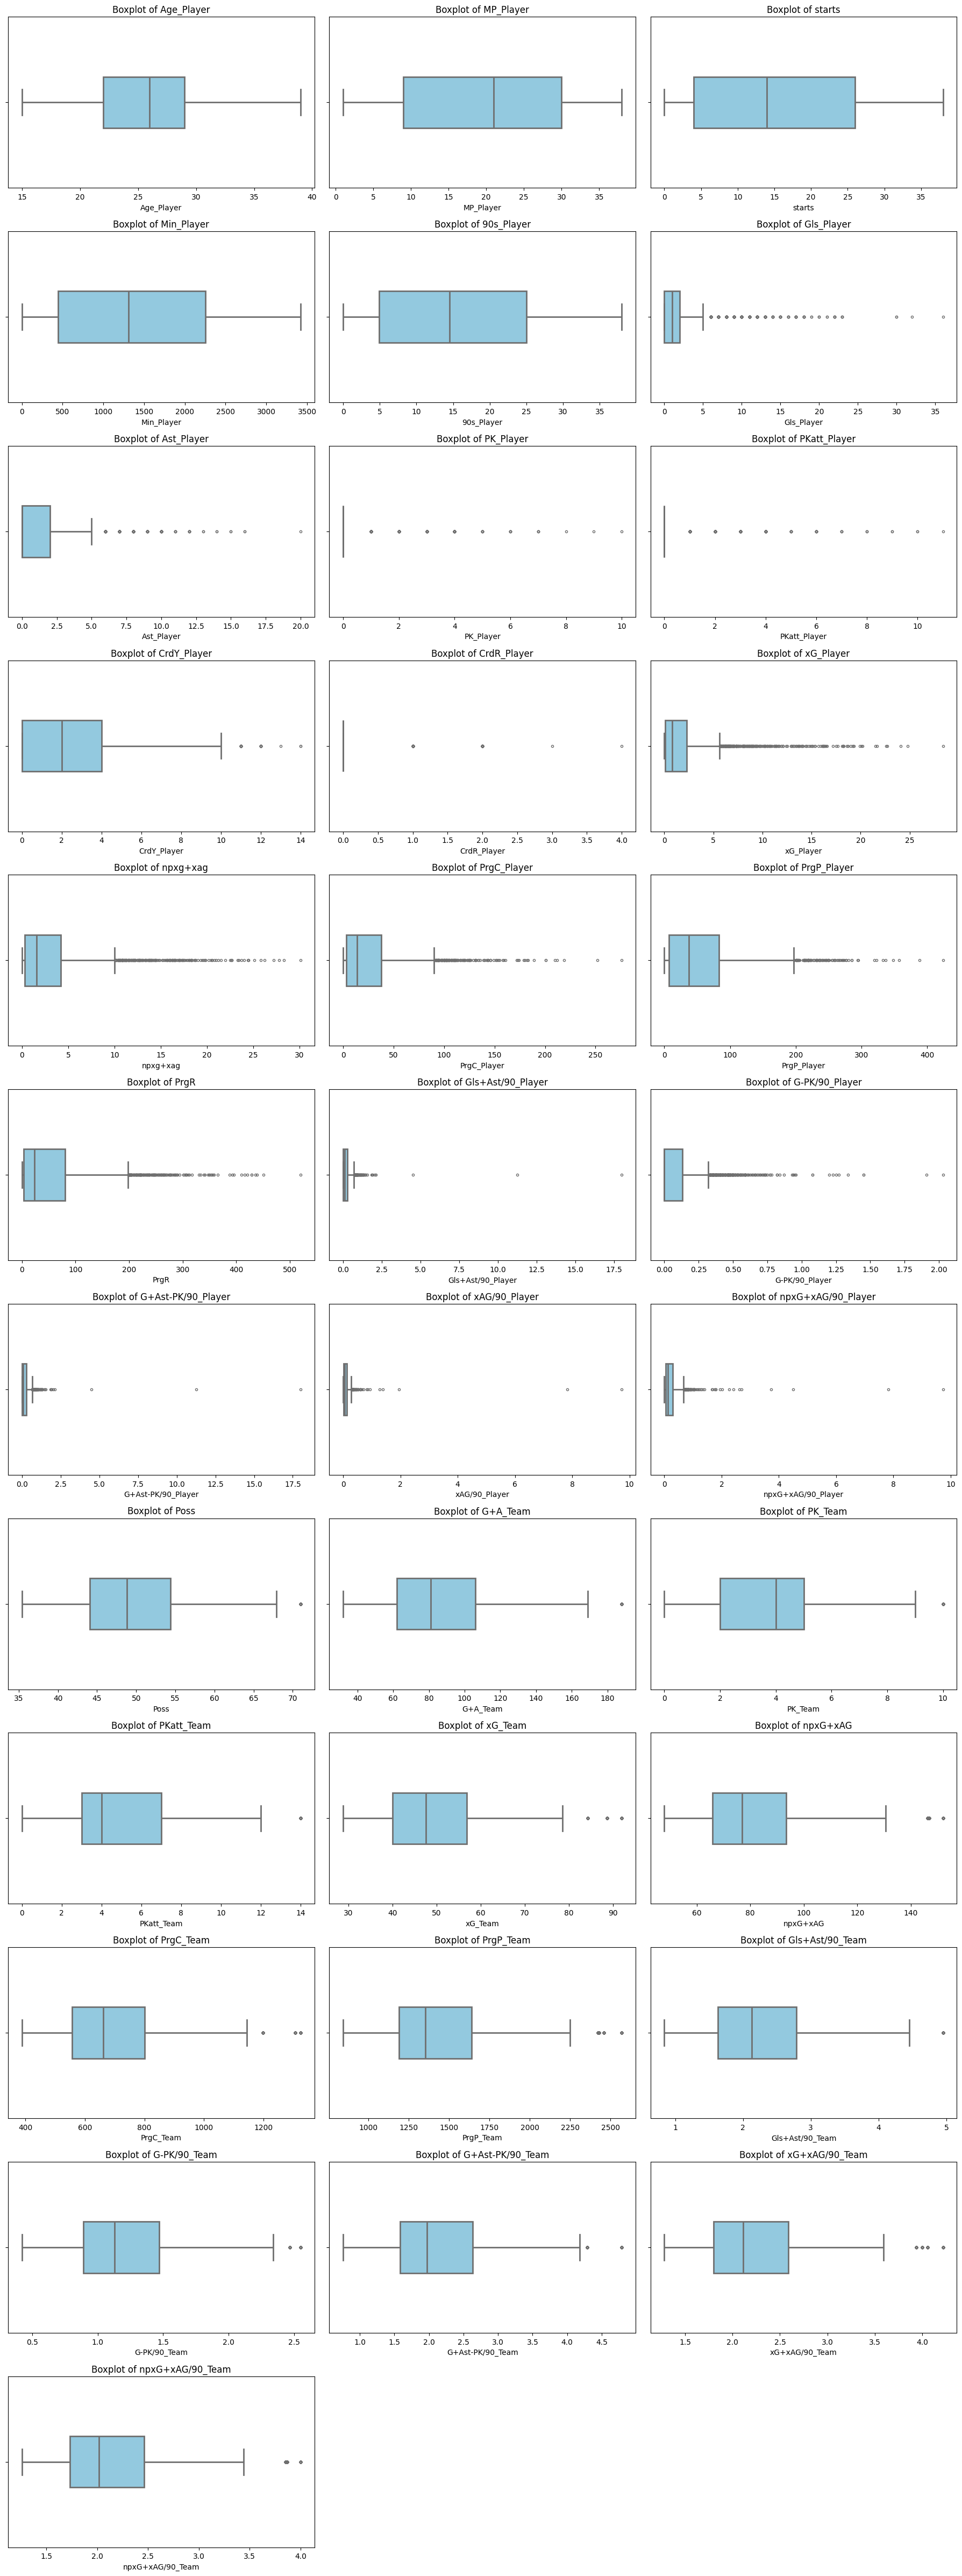

In [ ]:
num_rows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)
num_cols = min(len(numeric_columns), 3)


fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4*num_rows))
axes = axes.flatten()

# Plot boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=data[column], linewidth=2, width=0.3, color='skyblue', fliersize=3, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

# Remove empty subplots if any
for i in range(len(numeric_columns), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Conducting a distribution analysis for each column in the dataset to examine the spread and variability of data values. This analysis provides insights into the distribution patterns of numerical variables, helping us understand the data's central tendency, spread, and potential skewness. Understanding the distribution of each column is essential for making informed decisions during data analysis and modeling processes.


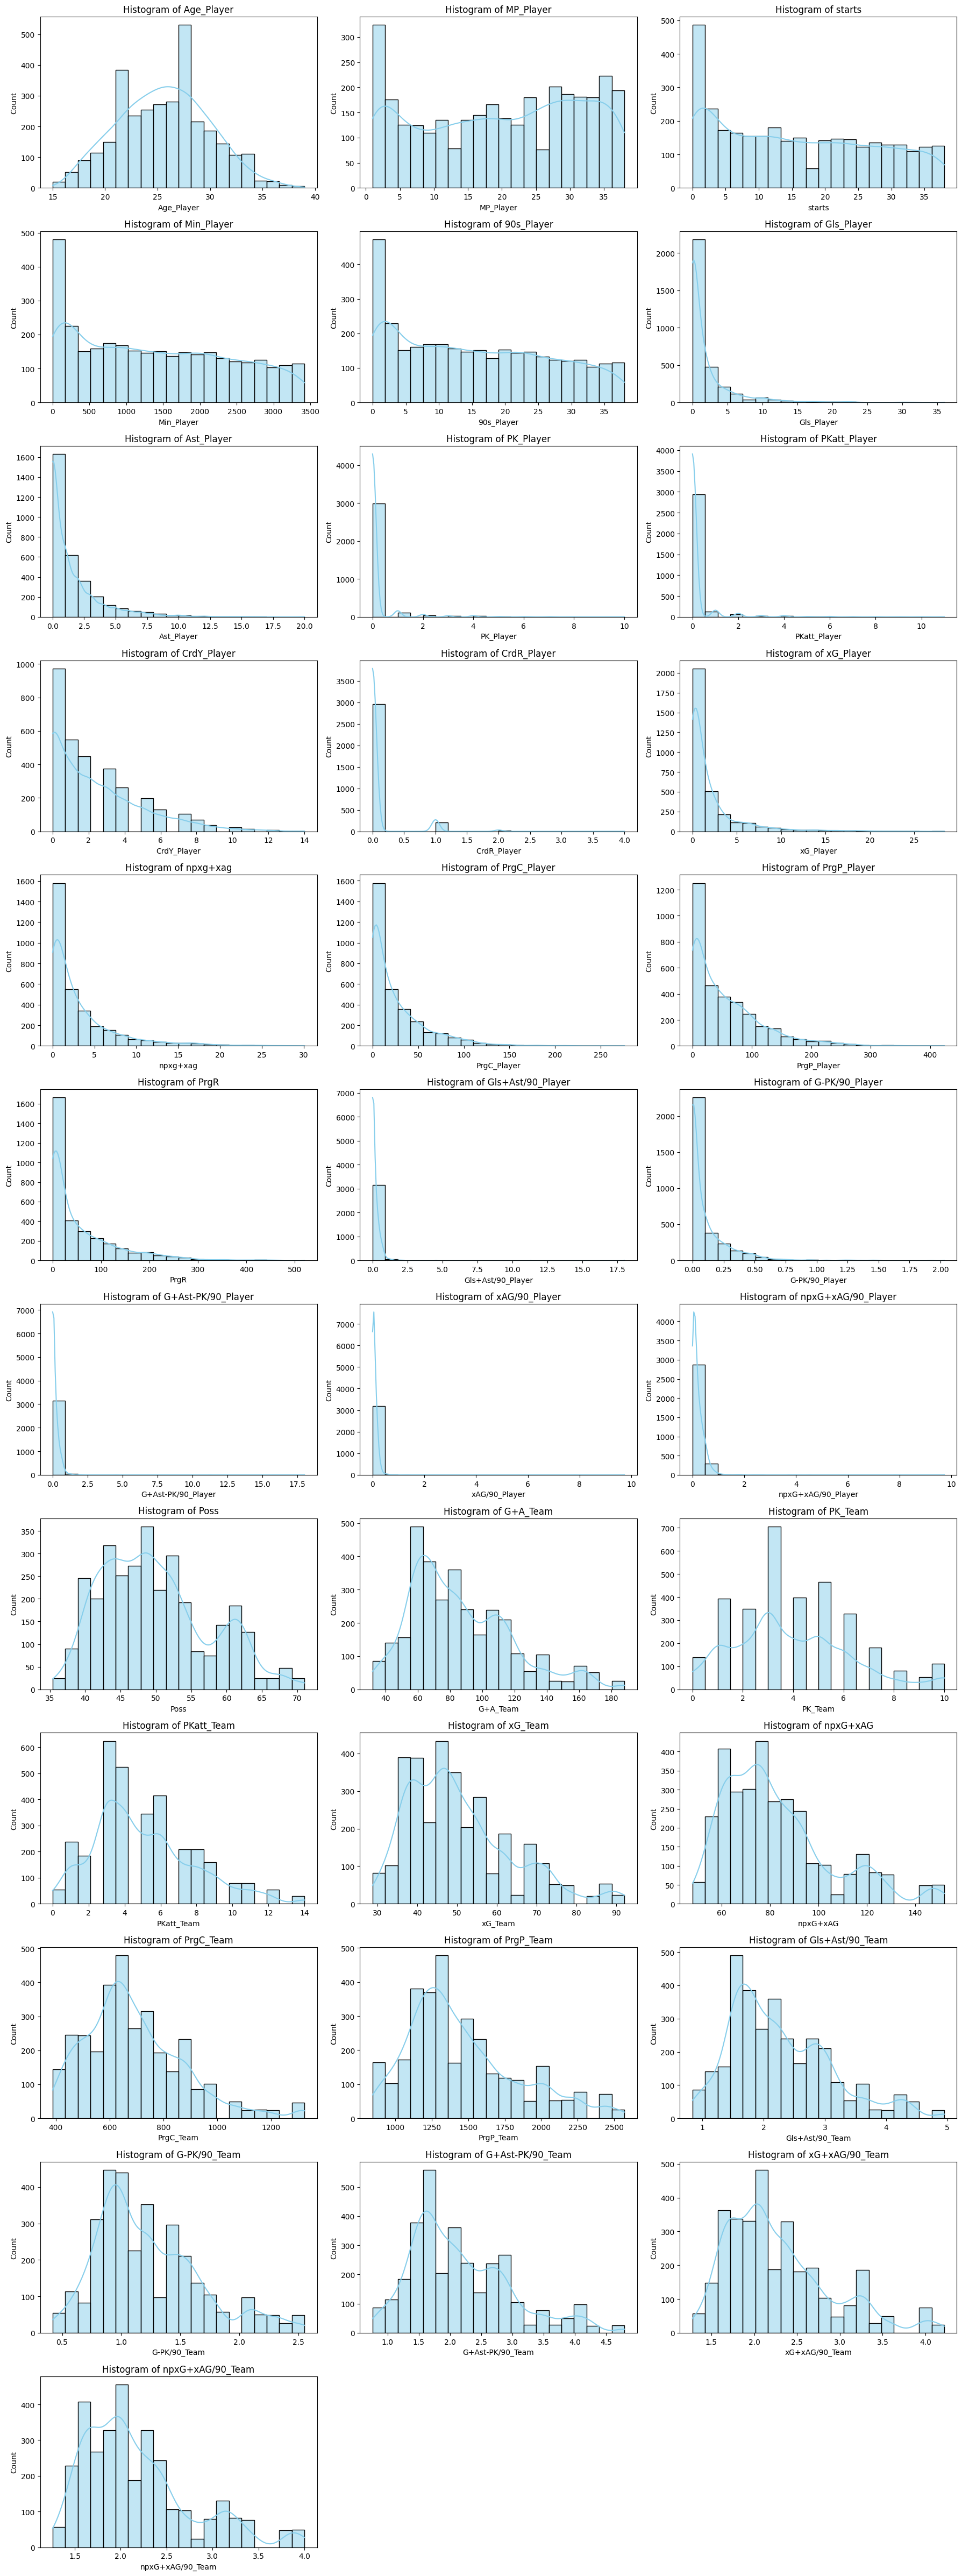

In [ ]:
num_rows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)
num_cols = min(len(numeric_columns), 3)


fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4*num_rows))
axes = axes.flatten()


for i, column in enumerate(numeric_columns):
    sns.histplot(data[column], ax=axes[i], color='skyblue', bins=20,kde=True)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)



for i in range(len(numeric_columns), num_rows*num_cols):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

In [ ]:
def calculate_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

def calculate_outliers_precent(data,col):
  lower_limit, upper_limit = calculate_outliers((data[col]))
  lower_outliers=len(data[(data[col])<lower_limit])
  upper_outliers=len(data[(data[col])>upper_limit])
  print(f"total outliers in col {col}  = ",upper_outliers+lower_outliers," with precentage of ",(upper_outliers+lower_outliers)/data.shape[0]*100)

  lower_limit, upper_limit = calculate_outliers(np.cbrt((data[col])))
  lower_outliers=len(data[np.cbrt((data[col]))<lower_limit])
  upper_outliers=len(data[np.cbrt((data[col]))>upper_limit])
  print(f"total outliers with cubic root in col {col}  = ",upper_outliers+lower_outliers," with precentage of ",(upper_outliers+lower_outliers)/data.shape[0]*100)

  lower_limit, upper_limit = calculate_outliers(np.sqrt((data[col])))
  lower_outliers=len(data[np.sqrt((data[col]))<lower_limit])
  upper_outliers=len(data[np.sqrt((data[col]))>upper_limit])
  print(f"total outliers with square root in col {col}  = ",upper_outliers+lower_outliers," with precentage of ",(upper_outliers+lower_outliers)/data.shape[0]*100)

  lower_limit, upper_limit = calculate_outliers(np.log1p((data[col])))
  lower_outliers=len(data[np.log1p((data[col]))<lower_limit])
  upper_outliers=len(data[np.log1p((data[col]))>upper_limit])
  print(f"total outliers with log base e in col {col}  = ",upper_outliers+lower_outliers," with precentage of ",(upper_outliers+lower_outliers)/data.shape[0]*100)


Calculating the number of outliers in each column of the dataset. This analysis aims to quantify the extent of deviation from the norm for each numerical variable, providing valuable insights into the data's distribution and identifying potential anomalies that may require further investigation. Understanding the prevalence of outliers in each column helps us assess the overall data quality and tailor our data processing and analysis strategies accordingly.


In [ ]:
for i in numeric_columns:
  calculate_outliers_precent(data,i)
  print()

total outliers in col Age_Player  =  0  with precentage of  0.0
total outliers with cubic root in col Age_Player  =  0  with precentage of  0.0
total outliers with square root in col Age_Player  =  0  with precentage of  0.0
total outliers with log base e in col Age_Player  =  0  with precentage of  0.0

total outliers in col MP_Player  =  0  with precentage of  0.0
total outliers with cubic root in col MP_Player  =  0  with precentage of  0.0
total outliers with square root in col MP_Player  =  0  with precentage of  0.0
total outliers with log base e in col MP_Player  =  0  with precentage of  0.0

total outliers in col starts  =  0  with precentage of  0.0
total outliers with cubic root in col starts  =  0  with precentage of  0.0
total outliers with square root in col starts  =  0  with precentage of  0.0
total outliers with log base e in col starts  =  0  with precentage of  0.0

total outliers in col Min_Player  =  0  with precentage of  0.0
total outliers with cubic root in col 

- After investigating the box plots and distributions, we have decided to leave the outliers as they are, as they represent real values within the dataset. By retaining the outliers, we ensure that the dataset reflects the true variability and diversity of the data, allowing for a more comprehensive and accurate analysis of the underlying trends and patterns.


### 2.5) Encoding

In [ ]:
data.head()

,player name,nationality,position,Squad,Age_Player,MP_Player,starts,Min_Player,90s_Player,Gls_Player,Ast_Player,PK_Player,PKatt_Player,CrdY_Player,CrdR_Player,xG_Player,npxg+xag,PrgC_Player,PrgP_Player,PrgR,Gls+Ast/90_Player,G-PK/90_Player,G+Ast-PK/90_Player,xAG/90_Player,npxG+xAG/90_Player,Season,Poss,G+A_Team,PK_Team,PKatt_Team,xG_Team,npxG+xAG,PrgC_Team,PrgP_Team,Gls+Ast/90_Team,G-PK/90_Team,G+Ast-PK/90_Team,xG+xAG/90_Team,npxG+xAG/90_Team
0,Patrick van Aanholt,nl,DF,Crystal Palace,26,28,25.0,2184.0,24.3,5,1,0,0,7,0.0,3.1,5.2,46.0,92.0,86.0,0.25,0.21,0.25,0.09,0.21,2017-2018,45.2,70,8,10,53.5,79.2,727,1308,1.84,0.95,1.63,2.28,2.08
1,Christian Benteke,be,FW,Crystal Palace,26,31,24.0,2240.0,24.9,3,5,1,2,6,0.0,10.2,11.5,18.0,42.0,133.0,0.32,0.08,0.28,0.12,0.46,2017-2018,45.2,70,8,10,53.5,79.2,727,1308,1.84,0.95,1.63,2.28,2.08
2,Yohan Cabaye,fr,MF,Crystal Palace,31,31,28.0,2376.0,26.4,0,1,0,0,7,0.0,2.3,6.4,13.0,138.0,37.0,0.04,0.00,0.04,0.15,0.24,2017-2018,45.2,70,8,10,53.5,79.2,727,1308,1.84,0.95,1.63,2.28,2.08
3,Lee Chung-yong,kr,"FW,MF",Crystal Palace,29,7,1.0,135.0,1.5,0,0,0,0,0,0.0,0.0,0.1,4.0,2.0,16.0,0.00,0.00,0.00,0.05,0.07,2017-2018,45.2,70,8,10,53.5,79.2,727,1308,1.84,0.95,1.63,2.28,2.08
4,Scott Dann,eng,DF,Crystal Palace,30,17,16.0,1435.0,15.9,1,0,0,0,4,0.0,2.3,2.5,7.0,42.0,3.0,0.06,0.06,0.06,0.01,0.16,2017-2018,45.2,70,8,10,53.5,79.2,727,1308,1.84,0.95,1.63,2.28,2.08


Conducting an examination of unique values in the 'position' column to understand the diversity of player positions within the dataset. This analysis provides insights into the distribution and variety of player roles, enabling us to tailor our analysis and strategies to accommodate the different positions effectively.


In [ ]:
data['position'].unique()

array(['DF', 'FW', 'MF', 'FW,MF', 'GK', 'MF,DF', 'DF,MF', 'MF,FW',
       'FW,DF', 'DF,FW'], dtype=object)

- After investigating the positions of the players, we've observed that the first two alphabets represent the primary position for each player. This pattern provides valuable insight into the predominant roles of the players within the dataset, allowing for more accurate categorization and analysis based on their primary positions.


In [ ]:
data['position']=data['position'].apply(lambda x : x[:2])

Conducting a verification process to ensure that the values in the 'position' column have been successfully converted based on the observed pattern. This check confirms that the conversion was accurately applied, enabling us to proceed with confidence in our analysis and interpretation of player positions.


In [ ]:
data['position'].unique()

array(['DF', 'FW', 'MF', 'GK'], dtype=object)

In [ ]:
data['position'].value_counts()

DF    1125
MF    1033
FW     810
GK     236
Name: position, dtype: int64

Since the position is a crucial feature, we'll encode it based on its significance for our target value. Forward positions will be given higher priority during encoding, reflecting their greater importance in our analysis and predictions. This encoding strategy ensures that the model appropriately captures the influence of player positions on the target variable.


In [ ]:
position_map={
    'GK':0,
    'DF':1,
    'MF':2,
    'FW':3
}


data['position']=data['position'].map(position_map)

Conducting a validation process to ensure that the 'position' column has been encoded correctly based on the specified priority, with Forward positions given higher priority. This validation confirms that the encoding accurately reflects the significance of player positions in our analysis, ensuring the reliability and effectiveness of our modeling approach.


In [ ]:
data['position'].unique()

array([1, 3, 2, 0])

### 2.6) Preparing Train and Test Data

Since our goal is to predict next season's goals, we'll align the features from the last season (e.g., 2017-2018) with the corresponding goals from the next season (e.g., 2018-2019). This approach ensures that our predictive model leverages the most recent data to make accurate predictions, aligning with the temporal sequence of the data and maximizing predictive performance.


Preparing our test data by aligning the features from the last season with the corresponding goals from the next season. This process ensures that our test dataset reflects the same temporal alignment as our training data, enabling us to evaluate the performance of our predictive model accurately on unseen data.


In [ ]:
features_test=data[data['Season']=='2021-2022'].drop(['Gls_Player'],axis=1)
features_test['player name']=features_test['player name'].str.lower()

In [ ]:
goals_test=data[data['Season']=='2022-2023'][['Gls_Player','player name']]
goals_test['player name']=goals_test['player name'].str.lower()

In [ ]:
test_data=pd.merge(features_test,goals_test,on='player name',how='outer')

In [ ]:
test_data.head()

,player name,nationality,position,Squad,Age_Player,MP_Player,starts,Min_Player,90s_Player,Ast_Player,PK_Player,PKatt_Player,CrdY_Player,CrdR_Player,xG_Player,npxg+xag,PrgC_Player,PrgP_Player,PrgR,Gls+Ast/90_Player,G-PK/90_Player,G+Ast-PK/90_Player,xAG/90_Player,npxG+xAG/90_Player,Season,Poss,G+A_Team,PK_Team,PKatt_Team,xG_Team,npxG+xAG,PrgC_Team,PrgP_Team,Gls+Ast/90_Team,G-PK/90_Team,G+Ast-PK/90_Team,xG+xAG/90_Team,npxG+xAG/90_Team,Gls_Player
0,max aarons,eng ENG,1.0,Norwich City,21.0,34.0,32.0,2881.0,32.0,2.0,0.0,0.0,8.0,0.0,0.8,2.5,78.0,117.0,85.0,0.06,0.0,0.06,0.05,0.08,2021-2022,42.9,37.0,3.0,3.0,32.3,54.3,566.0,1031.0,0.97,0.47,0.89,1.49,1.43,NaN
1,sam byram,eng ENG,1.0,Norwich City,27.0,15.0,11.0,1027.0,11.4,0.0,0.0,0.0,3.0,0.0,0.6,0.9,11.0,23.0,16.0,0.00,0.0,0.00,0.02,0.08,2021-2022,42.9,37.0,3.0,3.0,32.3,54.3,566.0,1031.0,0.97,0.47,0.89,1.49,1.43,NaN
2,todd cantwell,eng ENG,3.0,Norwich City,23.0,8.0,5.0,441.0,4.9,0.0,0.0,0.0,2.0,0.0,0.1,0.3,2.0,10.0,17.0,0.00,0.0,0.00,0.03,0.06,2021-2022,42.9,37.0,3.0,3.0,32.3,54.3,566.0,1031.0,0.97,0.47,0.89,1.49,1.43,NaN
3,kieran dowell,eng ENG,3.0,Norwich City,23.0,19.0,11.0,912.0,10.1,1.0,0.0,0.0,0.0,0.0,1.1,2.6,14.0,31.0,49.0,0.20,0.1,0.20,0.15,0.26,2021-2022,42.9,37.0,3.0,3.0,32.3,54.3,566.0,1031.0,0.97,0.47,0.89,1.49,1.43,NaN
4,dimitris giannoulis,gr GRE,1.0,Norwich City,25.0,18.0,14.0,1169.0,13.0,1.0,0.0,0.0,2.0,0.0,0.1,0.7,33.0,40.0,58.0,0.08,0.0,0.08,0.05,0.06,2021-2022,42.9,37.0,3.0,3.0,32.3,54.3,566.0,1031.0,0.97,0.47,0.89,1.49,1.43,NaN


In [ ]:
test_data.isnull().sum()

player name             0
nationality           247
position              247
Squad                 247
Age_Player            247
MP_Player             247
starts                247
Min_Player            247
90s_Player            247
Ast_Player            247
PK_Player             247
PKatt_Player          247
CrdY_Player           247
CrdR_Player           247
xG_Player             247
npxg+xag              247
PrgC_Player           247
PrgP_Player           247
PrgR                  247
Gls+Ast/90_Player     247
G-PK/90_Player        247
G+Ast-PK/90_Player    247
xAG/90_Player         247
npxG+xAG/90_Player    247
Season                247
Poss                  247
G+A_Team              247
PK_Team               247
PKatt_Team            247
xG_Team               247
npxG+xAG              247
PrgC_Team             247
PrgP_Team             247
Gls+Ast/90_Team       247
G-PK/90_Team          247
G+Ast-PK/90_Team      247
xG+xAG/90_Team        247
npxG+xAG/90_Team      247
Gls_Player  

In [ ]:
test_data.dropna(axis=0,inplace=True)

In [ ]:
x_test=test_data.drop(['Gls_Player'],axis=1)
y_test=test_data['Gls_Player']

In [ ]:
x_test.shape ,y_test.shape

((332, 38), (332,))

Preparing our training data by aligning the features from the previous season with the corresponding goals from the current season. This ensures that our training dataset reflects the temporal relationship between features and target variables, allowing our predictive model to learn patterns effectively and make accurate predictions.


In [ ]:
data['player name']=data['player name'].str.lower()
feature_2017=data[data['Season']=='2017-2018'].drop(['Gls_Player'],axis=1)
feature_2018=data[data['Season']=='2018-2019'].drop(['Gls_Player'],axis=1)
feature_2019=data[data['Season']=='2019-2020'].drop(['Gls_Player'],axis=1)
feature_2020=data[data['Season']=='2020-2021'].drop(['Gls_Player'],axis=1)
feature_2021=data[data['Season']=='2021-2022'].drop(['Gls_Player'],axis=1)
feature_2022=data[data['Season']=='2022-2023'].drop(['Gls_Player'],axis=1)

In [ ]:
goals_2017=data[data['Season']=='2017-2018'][['Gls_Player','player name']]
goals_2018=data[data['Season']=='2018-2019'][['Gls_Player','player name']]
goals_2019=data[data['Season']=='2019-2020'][['Gls_Player','player name']]
goals_2020=data[data['Season']=='2020-2021'][['Gls_Player','player name']]
goals_2021=data[data['Season']=='2021-2022'][['Gls_Player','player name']]
goals_2022=data[data['Season']=='2022-2023'][['Gls_Player','player name']]

In [ ]:
data_2017=pd.merge(feature_2017,goals_2018,on='player name',how='outer')
data_2018=pd.merge(feature_2018,goals_2019,on='player name',how='outer')
data_2019=pd.merge(feature_2019,goals_2020,on='player name',how='outer')
data_2020=pd.merge(feature_2020,goals_2021,on='player name',how='outer')
data_2021=pd.merge(feature_2021,goals_2022,on='player name',how='outer')

In [ ]:
train_data=pd.concat([data_2017,
data_2018,
data_2019,
data_2020,
data_2021],ignore_index=True)

In [ ]:
train_data.head()

,player name,nationality,position,Squad,Age_Player,MP_Player,starts,Min_Player,90s_Player,Ast_Player,PK_Player,PKatt_Player,CrdY_Player,CrdR_Player,xG_Player,npxg+xag,PrgC_Player,PrgP_Player,PrgR,Gls+Ast/90_Player,G-PK/90_Player,G+Ast-PK/90_Player,xAG/90_Player,npxG+xAG/90_Player,Season,Poss,G+A_Team,PK_Team,PKatt_Team,xG_Team,npxG+xAG,PrgC_Team,PrgP_Team,Gls+Ast/90_Team,G-PK/90_Team,G+Ast-PK/90_Team,xG+xAG/90_Team,npxG+xAG/90_Team,Gls_Player
0,patrick van aanholt,nl,1.0,Crystal Palace,26.0,28.0,25.0,2184.0,24.3,1.0,0.0,0.0,7.0,0.0,3.1,5.2,46.0,92.0,86.0,0.25,0.21,0.25,0.09,0.21,2017-2018,45.2,70.0,8.0,10.0,53.5,79.2,727.0,1308.0,1.84,0.95,1.63,2.28,2.08,3.0
1,christian benteke,be,3.0,Crystal Palace,26.0,31.0,24.0,2240.0,24.9,5.0,1.0,2.0,6.0,0.0,10.2,11.5,18.0,42.0,133.0,0.32,0.08,0.28,0.12,0.46,2017-2018,45.2,70.0,8.0,10.0,53.5,79.2,727.0,1308.0,1.84,0.95,1.63,2.28,2.08,1.0
2,yohan cabaye,fr,2.0,Crystal Palace,31.0,31.0,28.0,2376.0,26.4,1.0,0.0,0.0,7.0,0.0,2.3,6.4,13.0,138.0,37.0,0.04,0.00,0.04,0.15,0.24,2017-2018,45.2,70.0,8.0,10.0,53.5,79.2,727.0,1308.0,1.84,0.95,1.63,2.28,2.08,NaN
3,lee chung-yong,kr,3.0,Crystal Palace,29.0,7.0,1.0,135.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.1,4.0,2.0,16.0,0.00,0.00,0.00,0.05,0.07,2017-2018,45.2,70.0,8.0,10.0,53.5,79.2,727.0,1308.0,1.84,0.95,1.63,2.28,2.08,NaN
4,scott dann,eng,1.0,Crystal Palace,30.0,17.0,16.0,1435.0,15.9,0.0,0.0,0.0,4.0,0.0,2.3,2.5,7.0,42.0,3.0,0.06,0.06,0.06,0.01,0.16,2017-2018,45.2,70.0,8.0,10.0,53.5,79.2,727.0,1308.0,1.84,0.95,1.63,2.28,2.08,0.0


In [ ]:
train_data=train_data[train_data['Season']!='2022-2023']

In [ ]:
train_data.isnull().sum()

player name             0
nationality           973
position              973
Squad                 973
Age_Player            973
MP_Player             973
starts                973
Min_Player            973
90s_Player            973
Ast_Player            973
PK_Player             973
PKatt_Player          973
CrdY_Player           973
CrdR_Player           973
xG_Player             973
npxg+xag              973
PrgC_Player           973
PrgP_Player           973
PrgR                  973
Gls+Ast/90_Player     973
G-PK/90_Player        973
G+Ast-PK/90_Player    973
xAG/90_Player         973
npxG+xAG/90_Player    973
Season                973
Poss                  973
G+A_Team              973
PK_Team               973
PKatt_Team            973
xG_Team               973
npxG+xAG              973
PrgC_Team             973
PrgP_Team             973
Gls+Ast/90_Team       973
G-PK/90_Team          973
G+Ast-PK/90_Team      973
xG+xAG/90_Team        973
npxG+xAG/90_Team      973
Gls_Player  

In [ ]:
train_data.dropna(axis=0,inplace=True)

In [ ]:
train_data.drop(['player name','nationality','Squad','Season'],axis=1,inplace=True)
x_test.drop(['player name','nationality','Squad','Season'],axis=1,inplace=True)

In [ ]:
train_data.shape

(1733, 35)

### 2.7) Scaling

Scaling our data using the StandardScaler method.ensuring that all features contribute equally to the model's learning process. Standard scaling enhances the stability and convergence of our predictive model, leading to more reliable and accurate predictions.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

for i in train_data.columns:
    if i=='Gls_Player':
       continue
    train_data[i]=scaler.fit_transform(train_data[i].to_numpy().reshape(-1,1))
    x_test[i]=scaler.fit_transform(x_test[i].to_numpy().reshape(-1,1))

In [ ]:
train_data.head()

,position,Age_Player,MP_Player,starts,Min_Player,90s_Player,Ast_Player,PK_Player,PKatt_Player,CrdY_Player,CrdR_Player,xG_Player,npxg+xag,PrgC_Player,PrgP_Player,PrgR,Gls+Ast/90_Player,G-PK/90_Player,G+Ast-PK/90_Player,xAG/90_Player,npxG+xAG/90_Player,Poss,G+A_Team,PK_Team,PKatt_Team,xG_Team,npxG+xAG,PrgC_Team,PrgP_Team,Gls+Ast/90_Team,G-PK/90_Team,G+Ast-PK/90_Team,xG+xAG/90_Team,npxG+xAG/90_Team,Gls_Player
0,-0.821007,0.132793,0.434931,0.514118,0.473639,0.476673,-0.325430,-0.246228,-0.259970,1.604223,-0.302327,0.174799,0.261957,0.354802,0.366919,0.212263,0.022321,0.556930,0.037158,-0.024712,-0.054235,-0.794501,-0.751808,1.552471,1.588612,0.100589,-0.268447,-0.011964,-0.551589,-0.754079,-0.849881,-0.899673,-0.112047,-0.27589,3.0
1,1.407348,0.132793,0.718006,0.425084,0.530939,0.531927,1.349314,0.942389,1.764875,1.220600,-0.302327,2.184117,1.631304,-0.432126,-0.435665,0.802251,0.145512,-0.233188,0.090319,0.072620,0.608217,-0.794501,-0.751808,1.552471,1.588612,0.100589,-0.268447,-0.011964,-0.551589,-0.754079,-0.849881,-0.899673,-0.112047,-0.27589,1.0
4,-0.821007,1.154456,-0.603011,-0.287191,-0.292753,-0.296883,-0.744116,-0.246228,-0.259970,0.453353,-0.302327,-0.051603,-0.324906,-0.741276,-0.435665,-0.829631,-0.312055,-0.354745,-0.299527,-0.284266,-0.186725,-0.794501,-0.751808,1.552471,1.588612,0.100589,-0.268447,-0.011964,-0.551589,-0.754079,-0.849881,-0.899673,-0.112047,-0.27589,0.0
6,-0.821007,-1.655119,-0.225578,-0.198157,-0.128015,-0.131121,-0.744116,-0.246228,-0.259970,-0.313894,-0.302327,-0.645909,-0.737884,-0.235394,-0.210941,-0.478149,-0.417647,-0.719415,-0.405849,-0.251821,-0.531200,-0.794501,-0.751808,1.552471,1.588612,0.100589,-0.268447,-0.011964,-0.551589,-0.754079,-0.849881,-0.899673,-0.112047,-0.27589,0.0
7,-1.935184,1.154456,0.340572,0.692187,0.725351,0.725316,-0.744116,-0.246228,-0.259970,-0.697517,-0.302327,-0.702509,-0.759620,-0.938008,-1.109835,-0.867290,-0.417647,-0.719415,-0.405849,-0.251821,-0.557698,-0.794501,-0.751808,1.552471,1.588612,0.100589,-0.268447,-0.011964,-0.551589,-0.754079,-0.849881,-0.899673,-0.112047,-0.27589,0.0


In [ ]:
x_test.head()

,position,Age_Player,MP_Player,starts,Min_Player,90s_Player,Ast_Player,PK_Player,PKatt_Player,CrdY_Player,CrdR_Player,xG_Player,npxg+xag,PrgC_Player,PrgP_Player,PrgR,Gls+Ast/90_Player,G-PK/90_Player,G+Ast-PK/90_Player,xAG/90_Player,npxG+xAG/90_Player,Poss,G+A_Team,PK_Team,PKatt_Team,xG_Team,npxG+xAG,PrgC_Team,PrgP_Team,Gls+Ast/90_Team,G-PK/90_Team,G+Ast-PK/90_Team,xG+xAG/90_Team,npxG+xAG/90_Team
6,0.297735,-1.390584,0.135478,0.214415,0.194705,0.193740,-0.327506,-0.268812,-0.278056,-0.378952,-0.31189,-0.470104,-0.367621,-0.027197,0.843128,-0.631488,-0.310750,-0.751749,-0.297362,-0.100859,-0.282342,-1.112482,-1.853367,-0.759628,-1.004152,-1.385570,-1.308495,-0.793606,-1.166936,-1.858066,-1.982467,-1.872612,-1.325022,-1.304230
28,1.408389,-0.127800,0.706034,0.398834,0.389655,0.394030,0.552915,-0.268812,-0.278056,-1.127832,-0.31189,1.391143,1.365161,-0.366188,-0.563766,1.154477,0.289786,1.220969,0.305935,0.038084,0.447635,-0.439188,-0.859958,-0.230914,-0.591043,-0.510069,-0.474877,0.224943,-0.373219,-0.863183,-0.804665,-0.871536,-0.498416,-0.474108
29,1.408389,-0.380357,0.040386,-0.154423,-0.273600,-0.273604,0.112704,-0.268812,-0.278056,-0.753392,-0.31189,0.610620,0.498770,0.250159,-0.617192,0.524137,-0.002783,0.075520,0.012021,-0.031388,0.318815,-0.439188,-0.859958,-0.230914,-0.591043,-0.510069,-0.474877,0.224943,-0.373219,-0.863183,-0.804665,-0.871536,-0.498416,-0.474108
30,0.297735,0.882428,0.230571,-0.338842,-0.210029,-0.206840,-0.767716,-0.268812,-0.278056,-0.753392,-0.31189,0.010218,0.010037,0.989776,0.326673,0.169570,-0.202962,0.011884,-0.189078,-0.054545,-0.003233,-0.439188,-0.859958,-0.230914,-0.591043,-0.510069,-0.474877,0.224943,-0.373219,-0.863183,-0.804665,-0.871536,-0.498416,-0.474108
31,-0.812918,-0.127800,0.801126,1.044301,1.014768,1.013976,-0.767716,-0.268812,-0.278056,2.616571,-0.31189,-0.079843,-0.300975,-0.951718,-0.065120,-0.789073,-0.172165,0.139156,-0.158139,-0.239802,-0.325282,-0.439188,-0.859958,-0.230914,-0.591043,-0.510069,-0.474877,0.224943,-0.373219,-0.863183,-0.804665,-0.871536,-0.498416,-0.474108


### 2.8) Feature Selection

Generating a correlation heatmap to visualize the relationships between features and the target variable. This heatmap allows us to identify the most effective features by examining their correlation coefficients with the target. By selecting highly correlated features, we can improve the predictive power of our model and streamline the feature selection process.


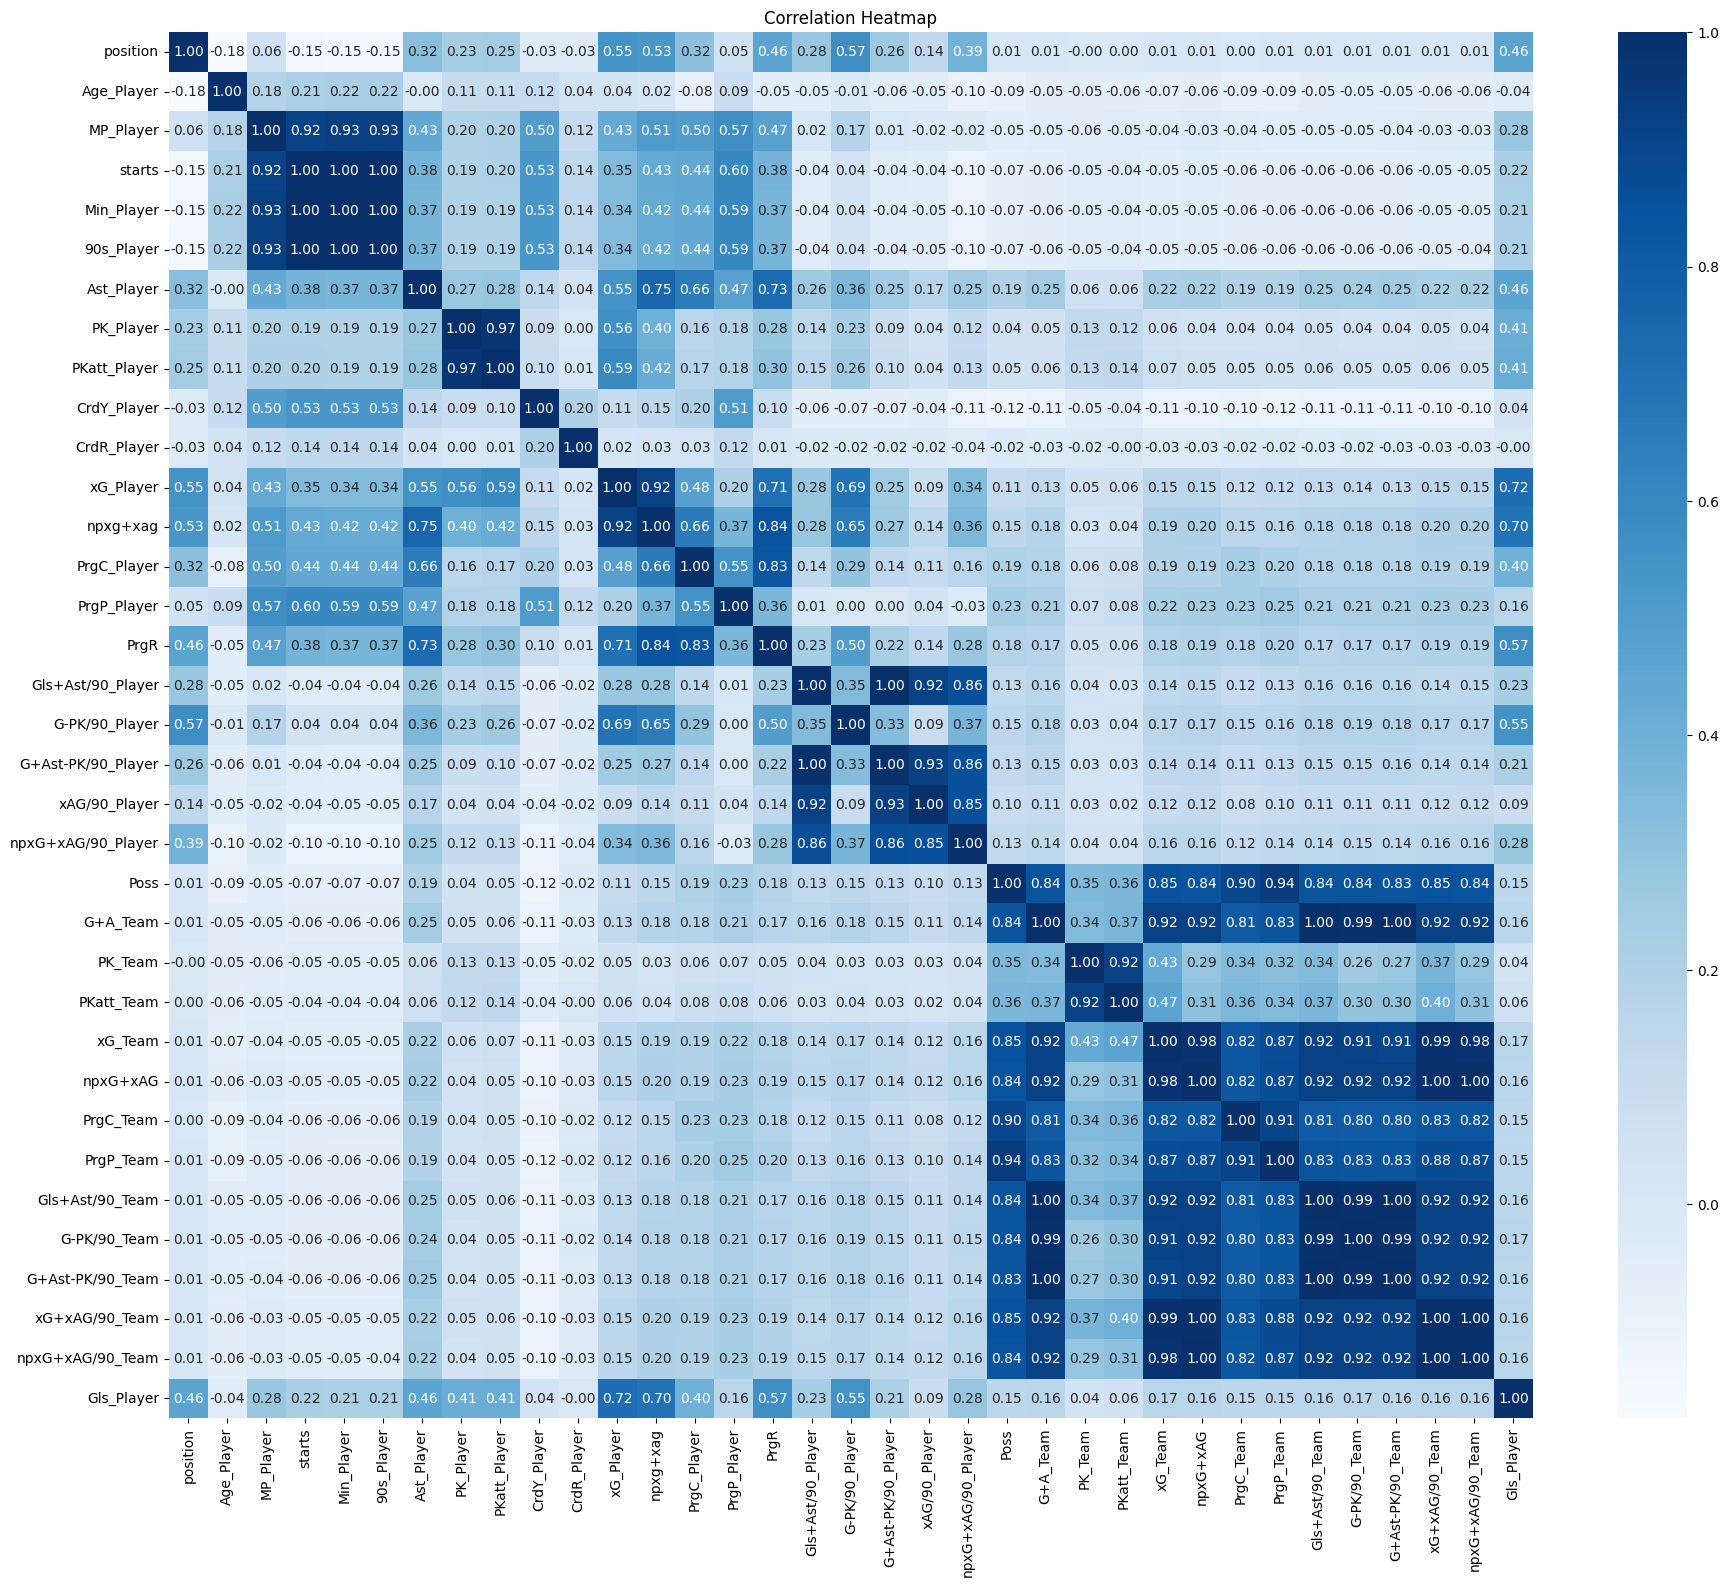

In [ ]:
plt.figure(figsize=(22, 18))
sns.heatmap(train_data.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Plotting the correlation between each feature and our target variable to identify the strength of their relationships. This visualization provides insights into which features have the highest correlation with the target, helping us prioritize the most influential variables for our predictive model. By focusing on features with strong correlations, we can enhance the accuracy and effectiveness of our predictions.


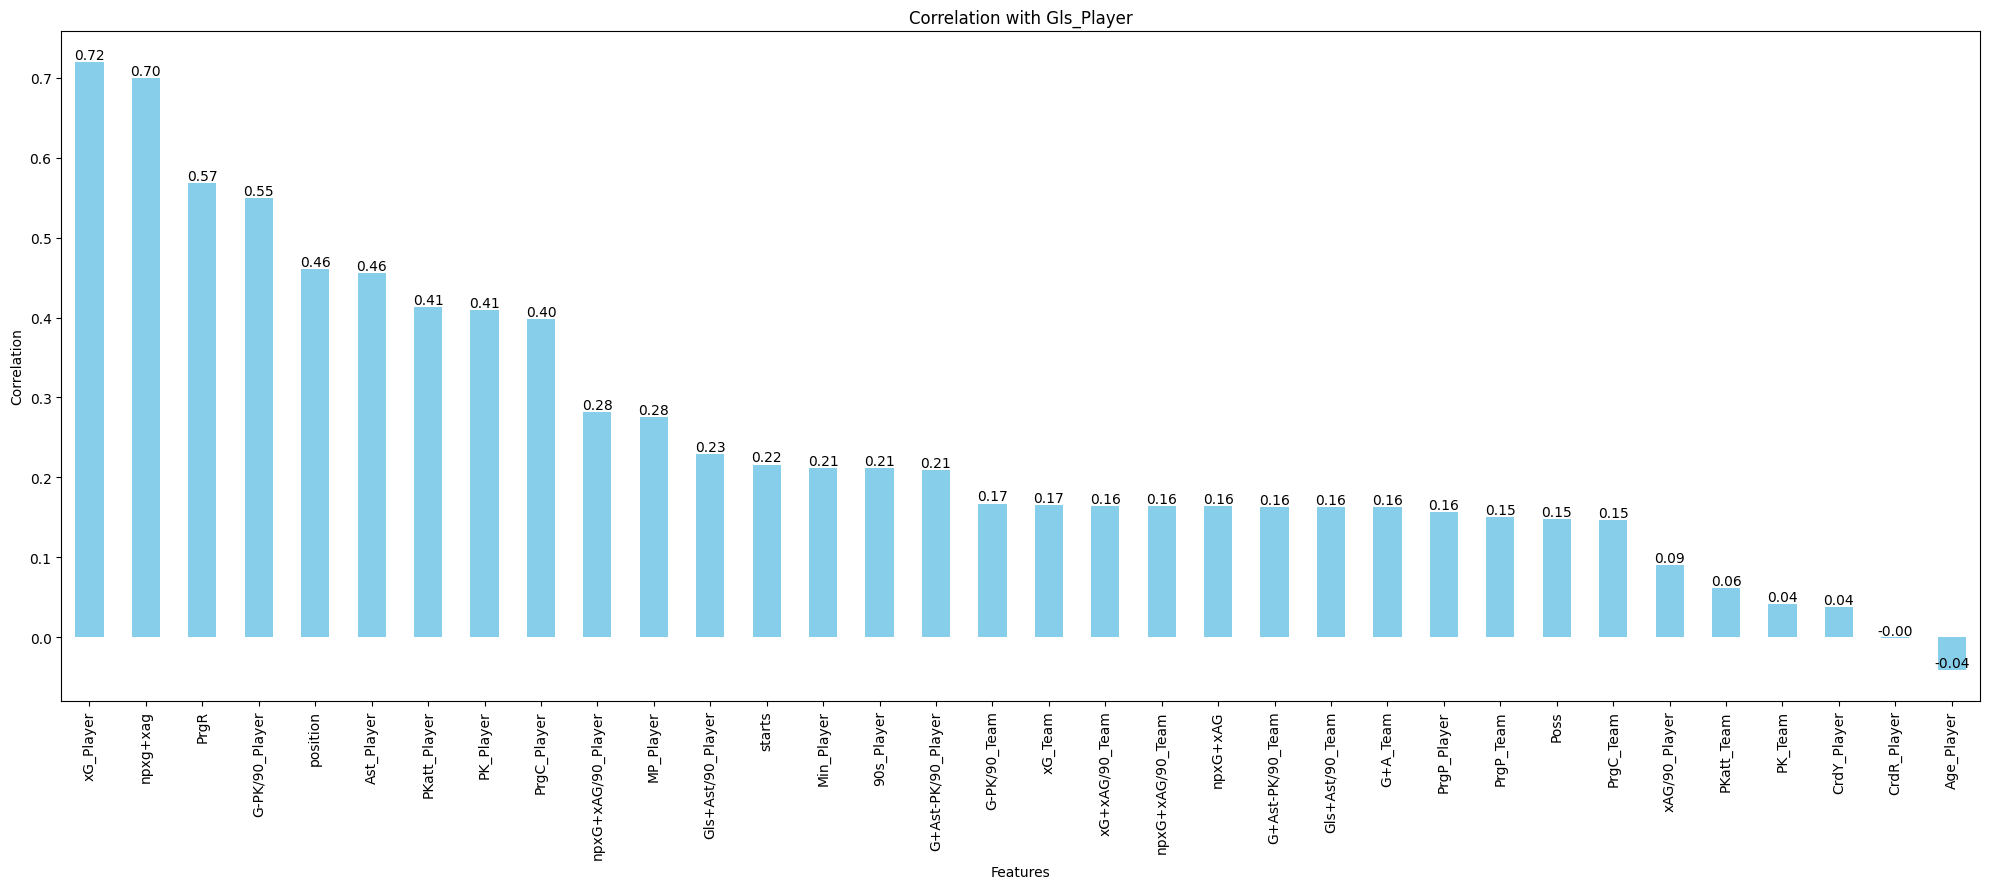

In [ ]:
correlations = train_data.corr()['Gls_Player'].drop('Gls_Player')
sorted_correlations = correlations.sort_values(ascending=False)

plt.figure(figsize=(20, 9))
ax = sorted_correlations.plot(kind='bar', color='skyblue')
plt.title("Correlation with Gls_Player")
plt.xlabel('Features')
plt.ylabel('Correlation')

for i, v in enumerate(sorted_correlations):
    ax.text(i, v + 0.0001, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

- We've observed that 'CrdY_Player', 'CrdR_Player', 'PK_Team', and 'Pkatt_Team' have correlations close to zero with our target variable. Since these features have negligible correlation with our target, they are unlikely to contribute significantly to our predictive model. Therefore, we'll exclude them from our feature set to streamline our model and improve its performance.


In [ ]:
features=train_data.drop(['Gls_Player'],axis=1)
target=train_data['Gls_Player']

In [ ]:
features.shape,target.shape

((1733, 34), (1733,))

Plotting an Analysis of Variance (ANOVA) to assess the statistical significance of each feature with respect to our target variable. This analysis helps us identify features that have a significant impact on our target, allowing us to prioritize them for inclusion in our predictive model. By selecting features with high F-scores and low p-values, we can improve the predictive power of our model.


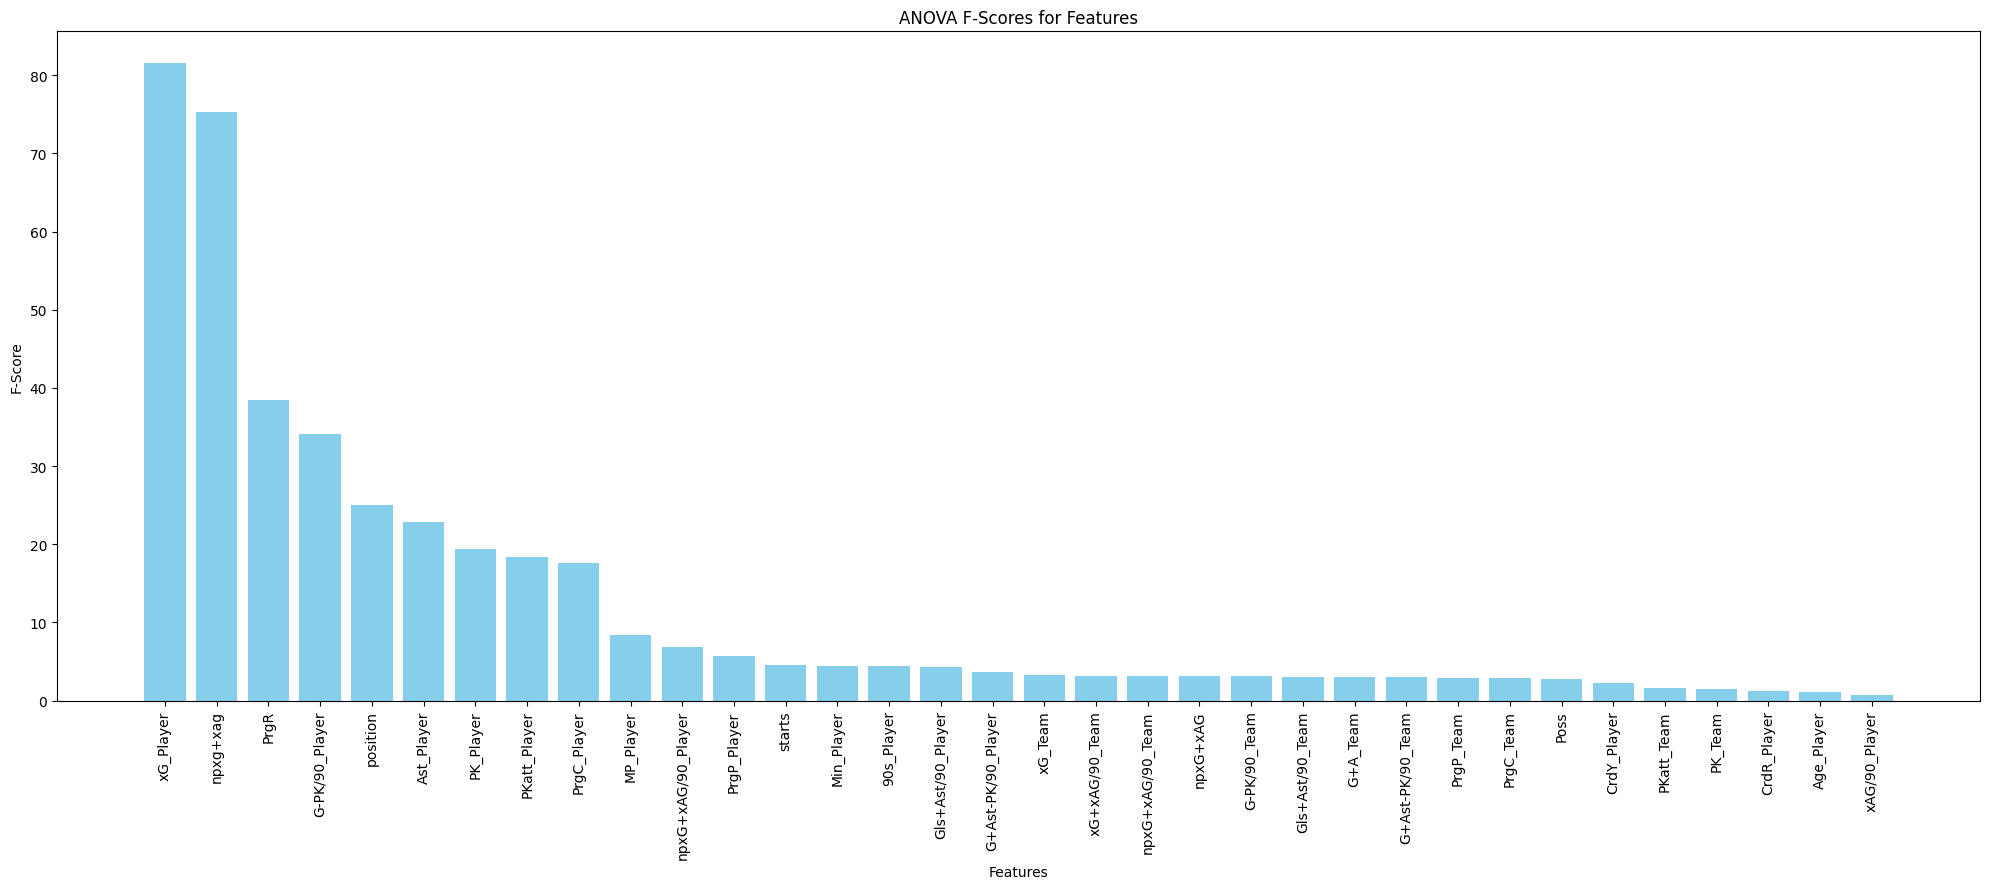

In [ ]:
from sklearn.feature_selection import f_classif
f_scores, _ = f_classif(features, target)

f_score_df = pd.DataFrame({'Feature': features.columns, 'F-Score': f_scores})
f_score_df.sort_values(by='F-Score', ascending=False, inplace=True)

plt.figure(figsize=(20, 9))
plt.bar(f_score_df['Feature'], f_score_df['F-Score'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('F-Score')
plt.title('ANOVA F-Scores for Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Removing the unnecessary features that have little to no impact on our predictive model. These features, such as 'CrdY_Player', 'CrdR_Player', 'PK_Team', and 'Pkatt_Team', were found to have negligible correlation and statistical significance with our target variable during our analysis. By excluding these irrelevant features, we streamline our model and improve its efficiency and performance.


In [ ]:
features.drop(['CrdR_Player','CrdY_Player','PK_Team','PKatt_Team'],axis=1,inplace=True)
x_test.drop(['CrdR_Player','CrdY_Player','PK_Team','PKatt_Team'],axis=1,inplace=True)

In [ ]:
features.shape,x_test.shape

((1733, 30), (332, 30))

Applying Principal Component Analysis (PCA) to our data to perform dimensionality reduction while retaining essential information. By extracting 11 principal components, we aim to reduce the dimensionality of our dataset while preserving as much variance as possible. This process allows us to simplify our model without sacrificing predictive accuracy, improving computational efficiency and interpretability.


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11)
pca.fit(features)

n_components = pca.n_components_

print("Number of selected principal components:", n_components)

reduced_data = pca.transform(features)

Number of selected principal components: 11


In [ ]:
reduced_data.shape

(1733, 11)

## [3] Modeling

Splitting our dataset into train and validation set to allow models training and validating and tuning model's parameters and enhance their performance.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(reduced_data,target,test_size=0.10,random_state=42,shuffle=True)

### 3.1) Linear Regression

Choosing linear regression as a primary choice for regression tasks to view it's performance and if there will be any need to choose another models further for better performance.

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regressor=LinearRegression()

linear_regressor.fit(x_train,y_train)

predictions=linear_regressor.predict(x_val)

Evaluating the linear regression model's predictions by analyzing the accuracy score,Mean Absolute and Mean Sqaure errors.

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


print("Accuracy = ",r2_score(y_val,predictions)*100)
print("MAE = ",mean_absolute_error(y_val,predictions)*100)
print("MSE = ",mean_squared_error(y_val,predictions)*100)


Accuracy =  57.90162397462719
MAE =  166.00451343881753
MSE =  678.5241491398243


* Linear Regression got accuracy of 57% which is not very good to rely on, with getting very high MSE and MAE errors,indicating the need for other models trial.

### 3.2) Polynomial Regression

Going for Polynomial Regression as a second option by increasing model complexity by rasing features to polynomial powers to allow model to capture non-linear reltation and enhance performance.

Plotting the MSE versus a range of polynomial degree to ensure a good selection  of optimal polynomial degree value with the least validation MSE for the degree hyper-parameter.

Degree of Validation =  1 MSE Val =  678.5241491398239
Degree of Validation =  2 MSE Val =  604.5214325473057
Degree of Validation =  3 MSE Val =  1294.1294624487439
Degree of Validation =  4 MSE Val =  62960587.60815925


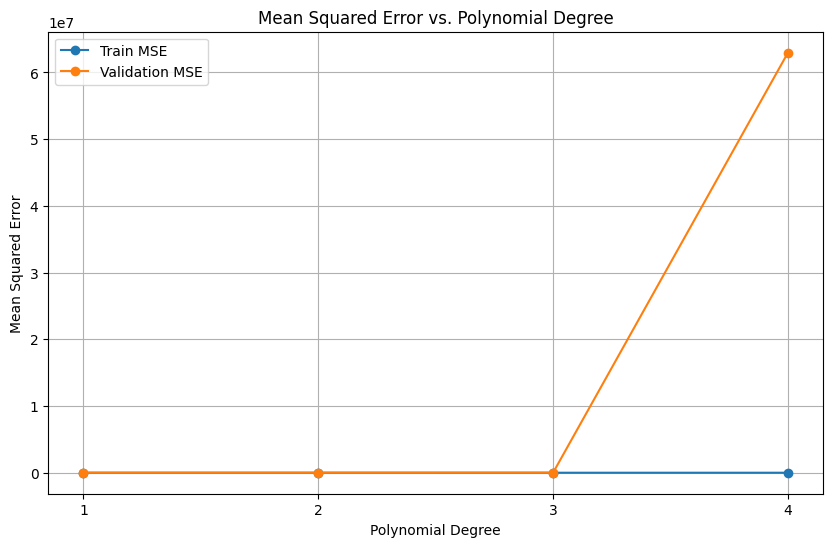

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degrees = np.arange(1, 5)
train_mse = []
val_mse = []
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(x_train)
    X_val_poly = poly.transform(x_val)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    print("Degree of Validation = ", degree , "MSE Val = ", mean_squared_error(y_val, y_val_pred)*100)
    train_mse.append(mean_squared_error(y_train, y_train_pred)*100)
    val_mse.append(mean_squared_error(y_val, y_val_pred)*100)

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mse, label='Train MSE', marker='o')
plt.plot(degrees, val_mse, label='Validation MSE', marker='o')
plt.title('Mean Squared Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

* As observed that ,small degrees showed less MSE than higher polynomial degrees between (1-5) with **degree = 2**, getting the lowest MSE = 604 among all the 5 values.

Transforming our features to polynomial features with degree 2 as chosen.

In [ ]:
poly_reg = PolynomialFeatures(2)

In [ ]:
x_train_poly = poly_reg.fit_transform(x_train)
x_val_poly = poly_reg.transform(x_val)

Applying Polynomial regression on the transformed features.

In [ ]:
poly_model=LinearRegression()
poly_model.fit(x_train_poly,y_train)

predictions=poly_model.predict(x_val_poly)

Evaluating the polynomial regression model's predictions by analyzing the accuracy score,Mean Absolute and Mean Sqaure errors.

In [ ]:
print("Accuracy = ",r2_score(y_val,predictions)*100)
print("MAE = ",mean_absolute_error(y_val,predictions)*100)
print("MSE = ",mean_squared_error(y_val,predictions)*100)

Accuracy =  62.49305110947623
MAE =  157.55762796019107
MSE =  604.5214325473057


* We can observe a slight increase in this model's accuracy with a good decrease in the MAE and MSE values,but still we can't tell that this model can be be very reliable gaining a 62% accuracy.So we will go for choosing advanced models like SVM to view it's ability to predict this task.

### 3.3) SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

HyperParameter tuning using GridSearch for SVM model to ensure the best and optimal combination of features that reduces the MSE.

In [ ]:
%%time
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 0.6, 4 ,2, 10, 20,100],
    'gamma': ['scale', 'auto']
}

svr = SVR()

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END C=0.1, gamma=scale, kernel=linear;, score=-8.557 total time=   0.2s
[CV 2/5] END C=0.1, gamma=scale, kernel=linear;, score=-9.219 total time=   0.2s
[CV 3/5] END C=0.1, gamma=scale, kernel=linear;, score=-6.022 total time=   0.2s
[CV 4/5] END C=0.1, gamma=scale, kernel=linear;, score=-5.876 total time=   0.2s
[CV 5/5] END C=0.1, gamma=scale, kernel=linear;, score=-8.135 total time=   0.2s
[CV 1/5] END ..C=0.1, gamma=scale, kernel=rbf;, score=-12.284 total time=   0.2s
[CV 2/5] END ..C=0.1, gamma=scale, kernel=rbf;, score=-14.560 total time=   0.2s
[CV 3/5] END ...C=0.1, gamma=scale, kernel=rbf;, score=-8.996 total time=   0.2s
[CV 4/5] END ...C=0.1, gamma=scale, kernel=rbf;, score=-9.745 total time=   0.2s
[CV 5/5] END ..C=0.1, gamma=scale, kernel=rbf;, score=-12.382 total time=   0.2s
[CV 1/5] END .C=0.1, gamma=auto, kernel=linear;, score=-8.557 total time=   0.2s
[CV 2/5] END .C=0.1, gamma=auto, kernel=linear;

Creating svm model instance with the best estimated values of GridSearch and and getting it's predictions.

In [ ]:
svm = grid_search.best_estimator_

predictions=svm.predict(x_val)

Evaluating the SVM model's predictions by analyzing the accuracy score,Mean Absolute and Mean Sqaure errors.

In [ ]:
print("Accuracy = ",r2_score(y_val,predictions)*100)
print("MAE = ",mean_absolute_error(y_val,predictions)*100)
print("MSE = ",mean_squared_error(y_val,predictions)*100)


Accuracy =  47.642297988232315
MAE =  176.8901573515658
MSE =  843.8797065957968


* The SVM model shows a significant decrease in accuracy compared to both the linear and polynomial regression models. This decrease is accompanied by a considerable increase in both Mean Squared Error (MSE) and Mean Absolute Error (MAE). These findings indicate that SVM is not well-suited for this task, as it fails to capture the underlying relationships between the features in the dataset effectively.

In [ ]:
transformed_test = pca.transform(x_test)

In [ ]:
transformed_test.shape

(332, 11)

In [ ]:
x_test_poly = poly_reg.fit_transform(transformed_test)

predictions = poly_model.predict(x_test_poly)

In [ ]:
print("Accuracy = ",r2_score(y_test,predictions)*100)
print("MAE = ",mean_absolute_error(y_test,predictions)*100)
print("MSE = ",mean_squared_error(y_test,predictions)*100)

Accuracy =  44.5546114030574
MAE =  168.6882597161893
MSE =  775.1946823643175


# Conclusion :

* After extensive experimentation with feature selection, hyperparameter tuning, and the exploration of different models for this predictive task, polynomial regression emerged as the optimal choice, exhibiting the lowest MAE and MSE values among the three models evaluated. However, it's noteworthy that even with polynomial regression, the attained error values remain relatively high, suggesting a lack of robust relationships and patterns between the features for the models to effectively capture. This indicates that the features may not sufficiently inform the models, underscoring the complexity and challenges inherent in the dataset.

* Expanding the dataset by collecting more data holds promise for reducing errors across all models. With more data available for training, models can delve deeper into the complex patterns within the dataset. This prolonged training period empowers models to more effectively capture complex relationships, potentially leading to improved accuracy overall.


# Credits:

This notebook is created by [Connect X](https://www.linkedin.com/company/connectx23/)
AI team.

-------------------------------------------

**Directed by:**

AI team director [Ammar Thabet](https://www.linkedin.com/in/ammar-thabett/)

**Team leader:**

[Mohamed samy](https://www.linkedin.com/in/mohamed-samy10/)

**Team members:**

-  [Bara gamal](https://www.linkedin.com/in/baraa-gamal-69b2ab255/)
-  [Mahmoud Tarek](https://www.linkedin.com)

